##### Credits 

creation date: 07/2023

author: Laetitia Lanfranchi

##### Initialisation

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
import tensorflow as tf

2023-10-03 14:17:20.680235: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-03 14:17:20.979778: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-03 14:17:20.985155: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-03 14:17:23.122686: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [ ]:
# from tensorflow.keras import Sequential, layers, regularizers
# from tensorflow.keras.callbacks import EarlyStopping
# from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

In [ ]:
# import utils

##### Data

In [ ]:
from sklearn.datasets import make_moons
X_moon, y_moon = make_moons(n_samples=1000, shuffle=True, noise=None, random_state=None)

from sklearn.datasets import make_blobs
X_blobs, y_blobs = make_blobs(n_samples=1200, n_features=8, centers=7, cluster_std=8.0, random_state=1, return_centers=False)

from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=100, resize=0.25)

import tensorflow_datasets as tfds
area, features = tfds.as_numpy(tfds.load('forest_fires', split='train', batch_size=-1, as_supervised=True,))
X_forest = pd.DataFrame(features).values
y_forest = area

from tensorflow.keras.datasets import mnist
(X_train_mnist, y_train_mnist), (X_test_mnist, y_test_mnist) = mnist.load_data()
X_train_mnist, X_test_mnist = X_train_mnist / 255., X_test_mnist / 255.

from tensorflow.keras.datasets import imdb
max_features = 10000  # Maximum number of words to get out of our imdb data
(X_train_imdb, y_train_imdb), (X_test_imdb, y_test_imdb) = imdb.load_data(num_words=max_features)

##### To read

How many layers / neurons do I need?

https://towardsdatascience.com/beginners-ask-how-many-hidden-layers-neurons-to-use-in-artificial-neural-networks-51466afa0d3e

The "Cross-Entropy" name comes from 📺 Shannon's Information Theory
 
https://www.youtube.com/watch?v=ErfnhcEV1O8


https://www.youtube.com/watch?v=Ilg3gGewQ5U


https://www.youtube.com/watch?v=d14TUNcbn1k&t=157s


http://neuralnetworksanddeeplearning.com/chap2.html#in_what_sense_is_backpropagation_a_fast_algorithm


https://kitt.lewagon.com/camps/1310/lectures/content/06-DL_04-RNN_NLP.html

###### Biblio

<a href = 'https://playground.tensorflow.org/'>Tensorflow Playground</a>

<a href = 'https://www.tensorflow.org/tutorials?hl=fr'>Tensorflow Tutorial</a>

<a href = 'https://www.tensorflow.org/guide?hl=fr'>TensorFlow UserGuide</a>

<a href = 'https://www.tensorflow.org/api_docs/python/tf/'>TensorFlow python API</a>

##### Overview

Networks:
- **Dense**: universal approximations, all the neurons from a layer are fully connected to the next layer
- **Convolution**: perform convolutions instead of linear regressions

Image
- Detection & recognition
- Segmentation
- Pose estimation

NLP
- Sentiment Analysis
- Translation

Sound
- Speech to text / speech recognition
- Detection of multiple sources in sounds / voices / signals

Captioning: image to text

Generation:
- DeepFake: picture, videos, sounds

##### Methodo

<font color='blue'>**1/ First, look for overfitting:**</font>
- **Model architecture**
        - Start simple, by the last layer
        - First layer needs to the shape of the input (at least for dense)
- Use callbacks / early stopping to monitor epochs
- Look for overfitting by improving the complexity of the model architecture and the **learning rate**

<font color='blue'>**2/ Then, improve generalization by making your model learn longer:**</font>
- Add **regularization**:
    - Start by the penultimate layer, then the previous ones
    - Do not regularize the last layer
    - Hesitate to regularize the first layers, as they are difficult to optimize
    - Be carefull when you use regularization and dropout, especially for the first layers
    
- Add **dropout** Layers
- Change **batch_size** only when you understand its impact


# Preprocessing

##### Initialization

In [ ]:
X = X_moon
y = y_moon

### Train, test, val

**Basic train test**

In [ ]:
from sklearn.model_selection import KFold, train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
# X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.3)

**Train val for cross validation**

In [ ]:
kf = KFold(n_splits=10)
kf.get_n_splits(X_train)

for train_index, val_index in kf.split(X_train):
    X_cv_train, X_cv_val = X_train[train_index], X_train[val_index]
    y_cv_train, y_cv_val = y_train[train_index], y_train[val_index]
    
    # Compute the cross validation manually

### Balancing

##### Introduction

https://imbalanced-learn.org

For train only (not the test of course, nor the val). And so:
- 'validation_split = float' cannot be used for unbalanced dataset
- 'validation_data = (X_val, y_val)' should be used instead

In [ ]:
from sklearn import set_config
set_config(display = 'diagram')

from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.under_sampling import RandomUnderSampler

##### Oversampling a minority class (or compute new instances of the minority class)

**SMOTE and ADASYN** - new samples in by interpolation

- **SMOTE, Synthetic Minority Oversampling TEchnique** - generating samples next to the original samples, without distinction between easy and hard samples to be classified using the nearest neighbors rule
- **ADASYN, Adaptive Synthetic** - generating samples next to the original samples which are wrongly classified using a k-Nearest Neighbors classifier

In [ ]:
# Generate new datapoints by weighting the existing ones

smote = SMOTE(
    sampling_strategy='auto',       # or float = desired ratio after resampling (minority / majority)
    random_state=42,
    k_neighbors=5,
    n_jobs=-1
)

X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

See also:
- RandomOverSampler
- SMOTENC
- SMOTEN
- ADASYN
- BorderLineSMOTE
- KMeansSMOTE
- SVMSMOTE

##### **Undersampling** the majority class

In [ ]:
# Downsample the majority class a little bit

rus = RandomUnderSampler(
    sampling_strategy='auto',       # or float = desired ratio after resampling (minority / majority) 
    random_state=42,
    replacement=True
)

X_train_resampled, y_train_resampled = rus.fit_resample(X_train, y_train)

See also:
- CondensedNearestNeighbour
- EditedNearestNeighbours
- RepeatedEditedNearestNeighbours
- AllKNN
- InstanceHardnessThreshold
- NearMiss
- NeighbourhoodCleaningRule
- OneSidedSelection
- TomekLinks

##### Rebalance & shuffle

In [ ]:
from sklearn.pipeline import Pipeline, make_pipeline, FeatureUnion, make_union

In [ ]:
# Pipelining the two strategies
steps =  [('o', smote), ('u', rus)]
pipeline = Pipeline(steps=steps)
pipeline

In [ ]:
# Rebalance the dataset
# X_train_resampled, y_train_resampled = pipeline.fit_resample(X_train, y_train)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
X_train_resampled, y_train_resampled = rus.fit_resample(X_train_resampled, y_train_resampled)

# Reshuffle the resampled data just to be sure
stacked_resampled_data = np.hstack([X_train_resampled, y_train_resampled.reshape(-1,1)])
np.random.shuffle(stacked_resampled_data)

X_train_resampled = stacked_resampled_data[:,:-1]
y_train_resampled = stacked_resampled_data[:,-1]

### Scaling and encoding

https://www.tensorflow.org/guide/keras/preprocessing_layers

#### To categorical

In [ ]:
from tensorflow.keras.utils import to_categorical

In [ ]:
y_cat = to_categorical(y_blobs, num_classes=7, dtype='int64')

#### Normalization

In [ ]:
normalizer = tf.keras.layers.Normalization()
normalizer.adapt(X_train) # Equivalent to fit

X_train_scaled = normalizer(X_train) # Can be included in the model architecture
X_test_scaled = normalizer(X_test)

In [ ]:
X_train.mean(), np.mean(X_train_scaled)

### Input pipeline for heavy datasets

https://www.tensorflow.org/guide/data

2 options: 
- Tensorflow input pipelines with <font color='blue'>**tf.data**</font>
- Tensorflow wrappers with **tf.keras.preprocessing** ('<font color='blue'>from directory</font>'), for 2D images, text or timeseries

#### tf.keras.preprocessing wrappers

- image_dataset_from_directory
- text_dataset_from_directory
- timeseries_dataset_from_array

In [ ]:
batch_size=32

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_data_dir,                                # directory where images are stored
#     subset="training",                           # optional if images are splitted in different directory
    validation_split=0.2,
    labels = "inferred",
    label_mode = "binary",
    seed=123,
    image_size=(150, 150),                          # resize on the fly
    batch_size=batch_size)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    test_data_dir,
#     subset="validation",                           # optional if images are splitted in different directory
    labels = "inferred",
    label_mode = "binary",
    seed=123,
    image_size=(150, 150),
    batch_size=batch_size)

In [ ]:
class_names = train_ds.class_names
print(class_names)

#### tf.data

- Load and process batch-per-batch in memory (ex: shuffle, resize, augmentation, and many many more)
- From different formats, storage places, etc.
- A dataset is a sequence (iterable) of elt with type representable by tf.TypeSpec, including: tf.Tensor, tf.sparse.SparseTensor, tf.RaggedTensor, tf.TensorArray, tf.data.Dataset

##### from_tensors and from_tensor_slices

In [ ]:
# From a data source IN MEMORY
dataset = tf.data.Dataset.from_tensors()
dataset = tf.data.Dataset.from_tensor_slices( (images, labels) )

##### TFRecordDataset

In [ ]:
# From a data source IN MEMORY, stored in TFRecord format
dataset = tf.data.TFRecordDataset(filenames)

In [ ]:
# Creates a dataset that reads all of the examples from two files.

fsns_test_file = tf.keras.utils.get_file("fsns_tfrec", "https://storage.googleapis.com/download.tensorflow.org/data/fsns-20160927/testdata/fsns-00000-of-00001")
fsns_test_file
# dataset = tf.data.TFRecordDataset(filenames = [fsns_test_file])
# dataset

In [ ]:
!tree /home/laetitia/.keras/datasets/fsns_tfrec

In [ ]:
raw_example = next(iter(dataset))
parsed = tf.train.Example.FromString(raw_example.numpy())

parsed.features.feature['image/text']

##### from_generator

In [ ]:
# From a python generator

def count(stop):
    i = 0
    while i < stop:
        yield i
        i += 1
    
ds_counter = tf.data.Dataset.from_generator(
    count,                                       # python generator, function
    args = [25],                                   # args of the python generator
    output_types = tf.int32, 
    output_shapes = ())

print('ds_counter', ds_counter)

for count_batch in ds_counter.repeat().batch(10).take(10):
    print(count_batch.numpy())

##### flow_from_directory + from_generator

In [ ]:
# Download flowers pic into a directory
flowers = tf.keras.utils.get_file(
    'flower_photos',
    'https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz',
    untar=True)

# Create the Image Data Generator
img_gen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255, rotation_range=20)

# Create a flow of images from the directory
images, labels = next(img_gen.flow_from_directory(flowers))

print(images.dtype, images.shape)
print(labels.dtype, labels.shape)

ds = tf.data.Dataset.from_generator(
    lambda: img_gen.flow_from_directory(flowers), 
    output_types = (tf.float32, tf.float32), 
    output_shapes = ([32,256,256,3], [32,5])
)

ds.element_spec

###### tf.data.TextLineDataset

In [ ]:
directory_url = 'https://storage.googleapis.com/download.tensorflow.org/data/illiad/'
file_names = ['cowper.txt', 'derby.txt', 'butler.txt']

file_paths = [
    tf.keras.utils.get_file(file_name, directory_url + file_name)
    for file_name in file_names
]

dataset = tf.data.TextLineDataset(file_paths)

for line in dataset.take(5):
    print(line.numpy())

In [ ]:
files_ds = tf.data.Dataset.from_tensor_slices(file_paths)
lines_ds = files_ds.interleave(tf.data.TextLineDataset, cycle_length=3)

for i, line in enumerate(lines_ds.take(9)):
    if i % 3 == 0:
        print()
    print(line.numpy())

#### Transformation

In [ ]:
dataset = dataset.map()          # tranformation per element
dataset = dataset.batch()        # tranformation per batch

dataset = tf.data.Dataset.zip((dataset1, dataset2))   # alternate dataset1 and dataset2
dataset = dataset1.concatenate(dataset2)              # dataset2 after dataset1 


#### Iteration and attributes

In [ ]:
for elem in dataset:
    print(elem.numpy())

it = iter(dataset)
next(it).numpy()

as_numpy_iterator()

In [ ]:
dataset.element_spec
dataset.element_spec.value_type

In [ ]:
ds_counter.repeat().take(10)
ds_counter.repeat().batch(10).take(10)

#### Reduction

In [ ]:
dataset.reduce(0, lambda state, value: state + value).numpy()

##### tf.data.experimental

In [ ]:
ds = tf.data.experimental.make_csv_dataset(data_processed_all.csv, batch_size=256)
model.fit(ds)

# Dense Neural Network

<font color='blue'>**Params: Neurons * (Inputs + 1)**</font>

In [ ]:
reg_l1_l2 = tf.keras.regularizers.l1_l2(l1=0, l2=0)

def init_model():

    inputs = tf.keras.layers.Input(X_train[0].shape)
    x = normalizer(inputs)    # pre processing (which has been fitted out of the model)

    x = tf.keras.layers.Dense(30, activation='relu')(x)
    x = tf.keras.layers.Dropout(rate=0.2)(x)

    x = tf.keras.layers.Dense(20, activation='relu', kernel_regularizer=reg_l1_l2)(x)
    x = tf.keras.layers.Dropout(rate=0.2)(x)

    x = tf.keras.layers.Dense(10, activation='relu', kernel_regularizer=reg_l1_l2)(x)
    x = tf.keras.layers.Dropout(rate=0.2)(x)

    # Regression > predict one value
    outputs = tf.keras.layers.Dense(1, activation='linear')(x)

    # Regression > predict 13 values
    outputs = tf.keras.layers.Dense(13, activation='linear')(x)

#     # Classification > predict 1 variable with 2 classes
#     outputs = tf.keras.layers.Dense(1, activation='sigmoid')(x)

#     # Classification > predict 1 variable with 13 classes
#     outputs = tf.keras.layers.Dense(13, activation='softmax')(x)

    model = tf.keras.Model(inputs=inputs, outputs=outputs)
    
    return model

In [ ]:
model = init_model()
model.summary()

##### Layer <font color='blue'>regularization</font>

In [ ]:
# Regularize weights only:
kernel_regularizer = tf.keras.regularizers.l1_l2(l1=0.005, l2=0.0005)

# Regularize weights and biais:
activity_regularizer = tf.keras.regularizers.l1_l2(l1=0.005, l2=0.0005)

# Regularize biais only (very rare):
bias_regularizer = tf.keras.regularizers.l1_l2(l1=0.005, l2=0.0005)

In [ ]:
reg_l1 = tf.keras.regularizers.L1(0.01)
reg_l2 = tf.keras.regularizers.L2(0.01)
reg_l1_l2 = tf.keras.regularizers.l1_l2(l1=0.005, l2=0.0005)

##### <font color='blue'>Dropout</font> Layer

In [ ]:
x = tf.keras.layers.Dropout(rate=0.2)(x)

# CNN

##### Intro

**Convolutional neural networks**

Go Jackets!

- https://poloclub.github.io/cnn-explainer/



number of params = (size of the kernels * nb of channels + 1 ) * number of filters

Our choice : number of filters and the kernel size for each layer
- The more filters, the more information we extract, but the more weights to learn (and the possibility to overfit)
- The kernel are computed for each channels (for colored images)
- (3, 3) and (5, 5) kernels are quite popular to scan 225 * 255 images for example

- It is common to have at least 2 or 3 block of layers, where the kernel size decreases and the number of filters increases (compared to the previous layers)
- For each block of layers, you can have 1, 2 or 3 convolutional layer, then a pooling layer (max or average) then a BatchNormalisation

State of the art : (224, 224, 3) (or (255, 255, 3)) - big images seems to be useless

## Preprocess images

### Rescaling, expand dim

In [ ]:
x = tf.keras.layers.Rescaling(1./255, offset=0)(inputs)

In [ ]:
X_train = tf.keras.backend.expand_dims(X_train, axis=-1)
X_test = tf.keras.backend.expand_dims(X_test, axis=-1)

### Augmentation

##### Intro

- rotations
- zoom
- slight transformation of the colors
- change of the textures
- "photoshop effects": blur, halo, ...
- deformations
- ...

Its impact strongly depends on:
- the model architecture you used
- the learning rate,
- the type of augmentation chosen, etc...

#### Augment data: <font color='blue'>ImageDataGenerator</font>

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
# Generation of new images

datagen = ImageDataGenerator(
    featurewise_center = False,
    featurewise_std_normalization = False,
    rotation_range = 10,
    width_shift_range = 0.1,
    height_shift_range = 0.1,
    horizontal_flip = True,
    zoom_range = (0.8, 1.2),
    ) 

In [ ]:
# Fit directly if images are already loaded and not too heavy. Else see how to fit on the flow

datagen.fit(X_train)

In [ ]:
# Observation of the new images

X_augmented_iterator = datagen.flow(X_train, shuffle=False, batch_size=1)
X_augmented_iterator

for i, (raw_image, augmented_image) in enumerate(zip(X_train, X_augmented_iterator)):
    _, (ax1, ax2) = plt.subplots(1, 2, figsize=(6, 2))
    ax1.imshow(raw_image)
    ax2.imshow(augmented_image[0])
    plt.show()
    
    if i > 10:
        break

#### Augment data on the flow: <font color='blue'>ImageDataGenerator and .flow</font>

Data are stored locally, augmentation is done on the flow, while fitting

In [ ]:
# Train Val Split
X_train, y_train = X_train[:40000], y_train[:40000]
X_val, y_val = X_train[40000:], y_train[40000:]

# Model initialization
model = init_model()
model = compile_model(model)

# Create a generator of augmented images
datagen = ImageDataGenerator(
    featurewise_center = False,
    featurewise_std_normalization = False,
    rotation_range = 10,
    width_shift_range = 0.1,
    height_shift_range = 0.1,
    horizontal_flip = True,
    zoom_range = (0.8, 1.2),
    ) 

# Create a flow of augmented images
train_flow = datagen.flow(X_train, y_train, batch_size = 64)
val_flow = datagen.flow(X_val, y_val, batch_size = 64)

# Fit on the flow
es = EarlyStopping(monitor='val_accuracy', 
                   mode='max', 
                   patience=5, 
                   verbose=1, 
                   restore_best_weights=True)

history = model.fit(train_flow,
                    epochs = 50,
                    callbacks = [es], 
                    validation_data = val_flow)

#### Load and augment on the flow: <font color='blue'>ImageDataGenerator and .flow_from_directory</font>

Data are loaded and augmented on the flow (from a directory), while fitting

In [ ]:
# Train Val Split
# Model initialization

# Create a generator of augmented images
datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2) # set validation split # check consistency with subset

# Create a flow of augmented images from a directory
train_generator = datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    subset='training') # set as training data

validation_generator = train_datagen.flow_from_directory(
    train_data_dir, # same directory as training data
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    subset='validation') # set as validation data

# Fit on the flow with fit_generator
model.fit_generator(
    train_generator,
    steps_per_epoch = train_generator.samples // batch_size,
    validation_data = validation_generator, 
    validation_steps = validation_generator.samples // batch_size,
    epochs = nb_epochs)

#### Augment data with dedicated layers within the model

<font color='red'>How to not apply the augmentation to the val and test data?</font>

In [ ]:
x = tf.keras.layers.RandomFlip("horizontal")(x)
x = tf.keras.layers.RandomZoom(0.1)(x)
x = tf.keras.layers.RandomTranslation(0.2, 0.2)(x)
x = tf.keras.layers.RandomRotation(0.1)(x)

## Model Architecture

### Conv2D

In [ ]:
def init_model():
    
    inputs = tf.keras.layers.Input(input_shape=(225, 225, 3))
    
    x = tf.keras.layers.Conv2D(32, kernel_size=5, strides=2, padding='same', activation='relu')(inputs)   
    x = tf.keras.layers.Conv2D(32, kernel_size=5, strides=2, padding='same', activation='relu')(x)   
    x = tf.keras.layers.MaxPool2D(pool_size=2)(x)
    x = tf.keras.layers.BatchNormalisation()(x)

    x = tf.keras.layers.Conv2D(64, kernel_size=3, strides=2, padding='same', activation='relu')(x)   
    x = tf.keras.layers.Conv2D(64, kernel_size=3, strides=2, padding='same', activation='relu')(x)   
    x = tf.keras.layers.MaxPool2D(pool_size=2)(x)
    x = tf.keras.layers.BatchNormalisation()(x)

    x = tf.keras.layers.Conv2D(128, kernel_size=3, activation='relu')(x)
    x = tf.keras.layers.Conv2D(128, kernel_size=3, activation='relu')(x)
    x = tf.keras.layers.MaxPool2D(pool_size=2)(x)
    x = tf.keras.layers.BatchNormalisation()(x)

    x = tf.keras.layers.GlobalMaxPooling2D()(x)
#     x = tf.keras.layers.Flatten()(x)

    x = tf.keras.layers.Dense(100, activation='relu')(x)
    x = tf.keras.layers.Dense(50, activation='relu')(x)
    
    ouputs = tf.keras.layers.Dense(10, activation='softmax')(x)
    
    model = tf.keras.Model(inputs=inputs, outputs=ouputs)
    
    return model

In [ ]:
adam = optimizers.Adam(learning_rate = 0.001)

def compile_model(model):
    model.compile(loss='sparse_categorical_crossentropy', # No need to OHE target
                  optimizer='adam',
                  metrics=['accuracy'])

##### Filters

Each filters is designed to exrtact specific information from the input

##### Padding and strides

**Strides**: how the kernel is moving on the image. It reduces the size of the images in output of the layer, and so act as a pooling layer before applying the convolution.

**Padding**: to take the borders into account

##### Pooling

In [ ]:
x = tf.keras.layers.MaxPool2D(pool_size=2)
x = tf.keras.layers.AveragePooling2D(pool_size=2)

### Conv3D and multi-ouputs

In [ ]:
tf.keras.layers.Conv3D(
    filters,
    kernel_size,
    strides=(1, 1, 1),
    padding='valid',
    data_format=None,
    dilation_rate=(1, 1, 1),
    groups=1,
    activation=None,
    use_bias=True,
    kernel_initializer='glorot_uniform',
    bias_initializer='zeros',
    kernel_regularizer=None,
    bias_regularizer=None,
    activity_regularizer=None,
    kernel_constraint=None,
    bias_constraint=None,
)

In [ ]:
def init_model():
        
    inputs = tf.keras.layers.Input(shape=(255, 255, 255, 1))
            
    x = tf.keras.layers.Conv3D(32, kernel_size=5, strides=1, padding='same', activation='relu')(inputs)   
    x = tf.keras.layers.Conv3D(32, kernel_size=5, strides=1, padding='same', activation='relu')(x)   
    x = tf.keras.layers.Conv3D(32, kernel_size=5, strides=1, padding='same', activation='relu')(x)   
    x = tf.keras.layers.MaxPooling3D(pool_size=3, padding='same')(x)
    x = tf.keras.layers.BatchNormalization()(x)

    x = tf.keras.layers.Conv3D(64, kernel_size=3, strides=1, padding='same', activation='relu')(x)   
    x = tf.keras.layers.Conv3D(64, kernel_size=3, strides=1, padding='same', activation='relu')(x)   
    x = tf.keras.layers.Conv3D(64, kernel_size=3, strides=1, padding='same', activation='relu')(x)   
    x = tf.keras.layers.MaxPooling3D(pool_size=3, padding='same')(x)
    x = tf.keras.layers.BatchNormalization()(x)
    
    x = tf.keras.layers.Conv3D(128, kernel_size=3, strides=1, padding='same', activation='relu')(x)   
    x = tf.keras.layers.Conv3D(128, kernel_size=3, strides=1, padding='same', activation='relu')(x)   
    x = tf.keras.layers.Conv3D(128, kernel_size=3, strides=2, padding='same', activation='relu')(x)   
    x = tf.keras.layers.MaxPooling3D(pool_size=3, padding='same')(x)
    x = tf.keras.layers.BatchNormalization()(x)
    
    x = tf.keras.layers.GlobalMaxPooling3D()(x)
#     x = tf.keras.layers.Flatten()(x)

    x = tf.keras.layers.Dense(64, activation='relu')(x)
    x = tf.keras.layers.Dropout(0.1)(x)
    
    x_bowel = tf.keras.layers.Dense(32, activation='relu')(x)
    x_extra = tf.keras.layers.Dense(32, activation='relu')(x)
    x_kidney = tf.keras.layers.Dense(32, activation='relu')(x)
    x_spleen = tf.keras.layers.Dense(32, activation='relu')(x)
    x_liver = tf.keras.layers.Dense(32, activation='relu')(x)

    bowel = tf.keras.layers.Dense(1, name='bowel', activation='sigmoid')(x_bowel)
    extra = tf.keras.layers.Dense(1, name='extra', activation='sigmoid')(x_extra)
    kidney = tf.keras.layers.Dense(3, name='kidney', activation='softmax')(x_kidney)
    spleen = tf.keras.layers.Dense(3, name='spleen', activation='softmax')(x_spleen)
    liver = tf.keras.layers.Dense(3, name='liver', activation='softmax')(x_liver)
    
    model = tf.keras.Model(inputs=inputs, outputs=(bowel, extra, kidney, spleen, liver))
    
    return model

init_model().summary();

In [ ]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
    
loss = {'bowel': tf.keras.losses.BinaryCrossentropy(),
        'extra': tf.keras.losses.BinaryCrossentropy(),  
        'kidney': tf.keras.losses.CategoricalCrossentropy(), 
        'spleen': tf.keras.losses.CategoricalCrossentropy(), 
        'liver': tf.keras.losses.CategoricalCrossentropy()}

metrics = {'bowel': ['accuracy', 'Recall', 'Precision'], 
           'extra': ['accuracy', 'Recall', 'Precision'],
           'kidney': ['accuracy', 'Recall', 'Precision'], 
           'spleen': ['accuracy', 'Recall', 'Precision'],
           'liver': ['accuracy', 'Recall', 'Precision']}

def compile(model):
    
    model.compile(
        optimizer=optimizer, 
        loss=loss, 
        metrics=metrics)
    
    return model

###### HuggingFace

DunnBC22/vit-base-patch16-224-in21k_covid_19_ct_scans

google/vit-base-patch16-224-in21k

raedinkhaled/deit-base-mri

raedinkhaled/swin-tiny-patch4-window7-224-finetuned-mri

raedinkhaled/vit-base-mri

### Visualize the activation of an image after every convolutional layer

In [ ]:
layers_outputs = [layer.output for layer in model.layers]
activation_model = Model(inputs=model.input, outputs=layers_outputs)
activations = activation_model.predict(X) # 11 predictions at once!
[activation.shape for activation in activations]

## Transfer learning

*Once your model has converged on the new data, you can try to unfreeze all or part of the base model and retrain the whole model end-to-end with a very low learning rate.*

Check on Hugging face:
- AlexNet
- VGG-16
- VGG 19
- ResNet50
- ResNet
- EfficientNet1

In [ ]:
base_model = tf.keras.applications.vgg16.VGG16(
    weights="imagenet", include_top=False, input_shape=(150, 150, 3))

base_model.trainable = False

#for layer in base_model.layers[:10]:
#  layer.trainable = False

In [ ]:
from tensorflow.keras.applications.vgg16 import preprocess_input

X_train = preprocess_input(X_train) 
X_val = preprocess_input(X_val)
X_test = preprocess_input(X_test)

In [ ]:
def init_model():
    inputs = tf.keras.layers.Input(shape = (150, 150, 3))
    
    x = data_augmentation(inputs) # We still have our data augmentation layers
    x = preprocess_input(x) # Then a preprocessing layer specifically designed for the VGG16
    x = base_model(x) # Then our transfer learning model

    x = tf.keras.layers.Flatten()(x) # Followed by our custom dense layers, tailored to our binary task

    x = tf.keras.layers.Dense(128, activation = "relu")(x)
    x = tf.keras.layers.Dropout(0.3)(x)
    x = tf.keras.layers.Dense(64, activation = "relu")(x)
    x = tf.keras.layers.Dropout(0.3)(x)
    outputs = tf.keras.layers.Dense(1, activation = "sigmoid")(x)

    model = tf.keras.layers.Model(inputs=inputs, outputs=outputs)
    
    return model

## Autoencoder and Conv2DTranspose

**Autoencoders** are Neural Network architectures trained to return **outputs that are as similar as possible to the original inputs fed to them**. They are used for:
- Image compression
- Denoising (cf. Google Pixel phones...)
- Image generation!

In [ ]:
def build_encoder(latent_dimension):
    '''returns an encoder model, of output_shape equals to latent_dimension'''
    
    inputs = tf.keras.layers.Input(input_shape=(28, 28, 1))
    
    x = tf.keras.layers.Conv2D(8, (2,2), activation='relu')(inputs)
    x = tf.keras.layers.MaxPooling2D(2)(x)

    x = tf.keras.layers.Conv2D(16, (2, 2), activation='relu')(x)
    x = tf.keras.layers.MaxPooling2D(2)(x)

    x = tf.keras.layers.Conv2D(32, (2, 2), activation='relu')(x)
    x = tf.keras.layers.MaxPooling2D(2)(x)     

    x = tf.keras.layers.Flatten()(x)
    
    outputs = tf.keras.layers.Dense(latent_dimension, activation='tanh')(x)
    encoder = tf.keras.Model(inputs=inputs, outputs=outputs)
    
    return encoder

In [ ]:
def build_decoder(latent_dimension):
    '''returns a decoder model, of intput_shape equals to latent_dimension'''
    '''The decoder's output_shape is equal to the encoder's input_shape (> autoencoder)'''

    inputs = tf.keras.layers.Input(input_shape(latent_dimension,))
    
    x = tf.keras.layers.Dense(7*7*8, activation='tanh')(inputs)
    x = tf.keras.layers.Reshape((7, 7, 8))(x)  # no batch axis here
    x = tf.keras.layers.Conv2DTranspose(8, (2, 2), strides=2, padding='same', activation='relu')(x)

    outputs = tf.keras.layers.Conv2DTranspose(1, (2, 2), strides=2, padding='same', activation='relu')(x)

    decoder = tf.keras.layers.Model(inputs=inputs, outputs=outputs)
    
    return decoder

In [ ]:
def build_autoencoder(encoder, decoder):
    inputs = Input((28, 28,1))
    encoded = encoder(inputs)
    decoded = decoder(encoded)
    autoencoder = Model(inputs, decoded)
    return autoencoder

In [ ]:
def compile_autoencoder(autoencoder):
    autoencoder.compile(loss='mse', optimizer='adam')
    return autoencoder

In [ ]:
encoder = build_encoder(2)
decoder = build_decoder(2)
autoencoder = build_autoencoder(encoder, decoder)

compile_autoencoder(autoencoder)

autoencoder.fit(X_train, X_train, epochs = 20, batch_size = 32)

# RNN

##### Introduction 

https://towardsdatascience.com/illustrated-guide-to-recurrent-neural-networks-79e5eb8049c9

**Recency bias**

Specific for sequences: <font color='blue'>time series, song, video, text, </font>etc.

<font color='blue'>**X.shape = (n_sequences, n_observations, n_features)**</font>
- n_sequences = dataset size, None
- n_observations = INPUT_LENGTH = temporal dimension of the input. 
        nb: a RNN dataset can have different input lengths / n_observation (cf. paddding)
- n_features = features you are observing (>1 for multi-inputs)


<font color='blue'>**y.shape = (n_sequences, output_lenght, n_features)**</font>
- n_sequences = number of sequences
- output_lenght = how many timesteps to predict, temporal dimension for the output
        must be the same for all the sequences
- n_features, features you want to predict (>1 for multi-ouputs)

<font color='blue'>Units</font>: nb of memories about features maintained in parallel (same idea as the nb of Neurons in Dense and the number of filters in CNN)

<font color='blue'>**Params**</font> does not depends on the n_observations

Les RNN ont tendances a avoir des gradients qui explosent ou disparaissent à cause de la récurrence

## RNN architecture

In [ ]:
def init_model():

    inputs = tf.keras.layers.Input( X_train[0].shape )

    x = tf.keras.layers.Normalization()(inputs)
    
    x = tf.keras.layers.LSTM(units=20, activation='tanh', return_sequences=True)(x)
    x = tf.keras.layers.LSTM(units=20, activation='tanh', return_sequences=False)(x)
    
    x = tf.keras.layers.Dense(10, activation='relu')(x)
    
    outputs = tf.keras.layers.Dense(1, activation='linear')(x)
    
    model = tf.keras.Model(inputs=inputs, outputs=outputs)
    
    return model

model = init_model()
model.summary()

##### Compilation > <font color='blue'>rmsprop</font> generally used

In [ ]:
optimizer='rmsprop'

## Layers: SimpleRNN vs LSTM vs GRU

##### Internal state h and weights

Internal state h is updated at each time step. The current observation x(t) and the previous internal state h(t−1) are concatenated and fed into a weights matrix to output the new internal state h(t)

One single RNN layer has a matrix W of trainable params, such that h(t)=fW(h(t−1),x(t)) 

The same weights W are used at every time step to recursively compute its internal state h

##### Weights (or params)

- **SimpleRNN**: Units * (Units + Features + 1)
- **LSTM**: 4 * Units * (Units + Features + 1)

##### Context, Gates, Internal state h

LSTM : Long Short Term Memory

GRU : Gated Recurrent Units (less parameters than LSTM)

LSTM and GRU have a notion of context, thanks to gates added in the computation of the internal state h.

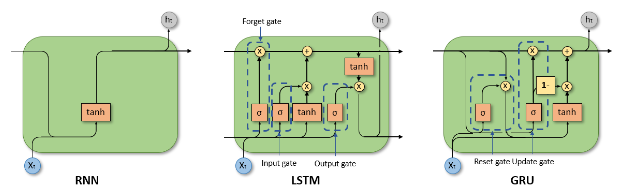

##### return_sequences

If True, it returns a sequence

## NLP

X.shape = (N_SEQUENCES, N_OBSERVATIONS, N_FEATURES)
- N_SEQUENCES = size of the dataset
- N_OBSERVATIONS = size of the text, can vary from one sequence to the others
- N_FEATURES = size of the embedding (usually from 30 up to 300 dimensions)

##### Initialization

In [ ]:
X_train, y_train, X_test, y_test = X_train_imdb, y_train_imdb, X_test_imdb, y_test_imdb

X_train.shape, y_train.shape, X_test.shape, y_test.shape

### Text preprocessing

**X_train, X_train_token, X_train_pad, X_train_embedded**

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

#### Tokenisation

In [ ]:
# Token

tk = tf.keras.preprocessing.text.Tokenizer(
    num_words=None,               # maximum number of words to keep, based on word frequency
    filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',
    lower=True,                   # Whether to convert the texts to lowercase.
    split=' ',
    char_level=False,             # if True, every character will be treated as a token.
    oov_token=None,               # replace out-of-vocabulary words during text_to_sequence
    analyzer=None,
)

tk.fit_on_texts(X_train)

X_train_token = tk.texts_to_sequences(X_train)
X_test_token = tk.texts_to_sequences(X_test)

vocab_size = len(tk.word_index)
vocab_size

#### Padding

In [ ]:
plt.hist(len(X_train_token))
maxlen=200 # cf. histogram of the sentences lenght

In [ ]:
# Pad data

X_train_pad = tf.keras.preprocessing.sequence.pad_sequences(
    X_train_token, 
    maxlen=maxlen,                # cf. histogram of the sentences lenght
    dtype='int32', 
    padding='pre', 
    truncating='pre')

X_test_pad = tf.keras.preprocessing.sequence.pad_sequences(
    X_test_token, 
    maxlen=maxlen, 
    dtype='int32', 
    padding='pre', 
    truncating='pre')

#### Embedding

##### Introduction

**Option 1**: Sequential <font color='blue'>**layers.embedding**</font> + RNN
- pro: dedicated to the task
- con: nb of params, time of each epoch, time to converge 

**Option 2**: First lean an embedding with <font color='blue'>**Word2Vec**</font> (unsupervised learning) then use it to feed a RNN
- to be prefered on small corpus (esp. with transfer learning) 

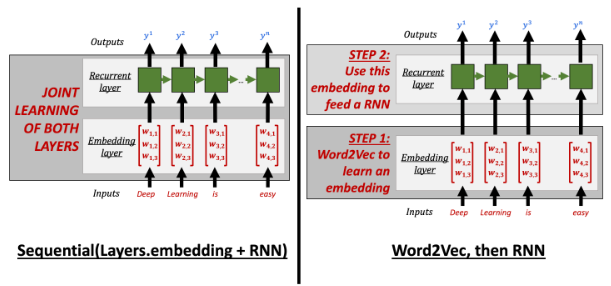

##### <font color='blue'>Embedding layer</font> (embedding on the flow)

In [ ]:
# Insert the embedding layer after the tokenization 

tf.keras.layers.Embedding(
    input_dim=VOCAB_SIZE + 1,
    input_length=MAX_SENTENCE_LENGTH,
    output_dim=EMBED_DIM,
    mask_zero=True
)

##### <font color='blue'>Word2Vec</font> (embedding upfront the RNN)

###### Word2Vec: Train an unsupervised embedding model from scratch

https://radimrehurek.com/gensim/models/word2vec.html

In [ ]:
from gensim.models import Word2Vec

word2vec = Word2Vec(sentences=X_train)
wv = word2vec.wv

###### Word2Vec: Load a pretrained embedding model

https://radimrehurek.com/gensim/downloader.html

In [ ]:
import gensim.downloader

# List of existing models
print(list(gensim.downloader.info()['models'].keys()))

# Load a chosen model
model_wiki = gensim.downloader.load('glove-wiki-gigaword-50')

In [ ]:
model_wiki['dog']

### RNN NLP architecture

<font color='blue'>**Params of the embedding layers: (vocab_size + 1) * output dim**</font>

In [ ]:
embedding_size=50

def init_model():

    inputs = tf.keras.layers.Input(shape=max_len)

    x = tf.keras.layers.Embedding(input_dim=vocab_size + 1,
#                                   input_length=max_len,
                                  output_dim=embedding_size,
                                  mask_zero=True)(inputs)

    x = tf.keras.layers.LSTM(units=20, activation='tanh', return_sequences=False)(x)
    x = tf.keras.layers.Dense(10, activation='relu')(x)
    
    outputs = tf.keras.layers.Dense(1, activation='sigmoid')(x)
    model = tf.keras.Model(inputs=inputs, outputs=outputs)
    
    return model

model = init_model()
model.summary()

# Transformers

## Intro

https://huggingface.co/docs/transformers/index

##### History of generativ AI models

Before transformers, most of the models were images based
- Variational Autoencoder (2014 > 2019)
- Generative Adversarial Network - GAN (2014 > 2022)

Transformers (2017, paper '**Attention is All You Need**') are an evolution of the GRU model (2014): <font color='blue'>**Autoregressive / Transformer**</font> (2014 > 2023)

Which has lead to a massiv explosion of transformers models, the most known: 
- <font color='blue'>GPT</font> - Generativ Pre trained Transformer, from OpenAI
- <font color='blue'>LLaMA</font>, Large Language Model Meta AI, from Meta
- <font color='blue'>Bloom</font>, BigScience Large Open-science Open-access Model, from HuggingFace
- <font color='blue'>Bert</font>, Bi-directional Encoder Representation from Transformers, from Google

More recently: <font color='blue'>**Multimodal Modal**</font> (2021 > 2023)

**ChatGPT**:
- Huge amounts of data and training
- 175B weights
- RLHF - Reinforcement Learning from Human Feedbacks (40 people for multiple months)
- 1 epoch

##### Point of attention

- Tokenisation and model must match
- Data on which the model has been trained

## Deep dive on attention

#### Overview of a transformer model

**Encoder-only (e.g. BERT)**: converts an input sequence to a numerical representations. Uses words to the left and right of each word (hence "bidirectional") and is great for things like classification.

**Decoder-only (e.g. GPT)**: takes an input sequence and iteratively predicts the most likely next word (can also be used in a similar manner to encoder-decoder if trained correctly)

**Encoder-decoder** (e.g. T5 or original "Attention is all you need" paper model): maps one sequence to another

Sentence by sentence

ENCODER: from a sequence to a classification vector and/or a sequence
Multiple encoders, with all identical architectures
- Positional encoding and word embeddings
- Block 1: 
    - Multi-heads attention layer
    - Feed-forward layer
- Block N: 
    - Multi-heads attention layer
    - Feed-forward layer
- Encoder output:
    - Classification vector > to be transmitted to classification layer
    - Sequence of tokens > to be transmitted to a decoder
   
DECODER: from a sequence to a word
Multi-decoders: all identical architectures
- Positional encoding and word embeddings
    - Of the target, if encoder/decoder
    - Of the input, if decoder only
- Block 1
    - MASKED multi-head ATTENTION layer
    - (if encoder) Multi-heads CROSS ATTENTION with the encoder output
    - Feed-forward layer
- Block N
    - MASKED multi-head ATTENTION layer
    - (if encoder) Multi-heads CROSS ATTENTION with the encoder output
    - Feed-forward layer
- Decoder output
    - A token to be decoded into a word

NB: The decoder must be called iteratively to produce a whole sentence

**Self-attention** operates within a single sequence and captures the relationships between tokens within that sequence.

**Cross-attention** operates between two different sequences (source and target sequences) and captures the relationships between tokens from the source sequence and tokens from the target sequence
- source sequence (keys and values)
- target sequence (query)

##### Other notions

**Self-padding mask**

Masks out padding tokens during self-attention


**Skip layers**

Information from earlier layers is propagated directly to later layers, aiding in the retention of valuable information during training.

Skip connections enable faster convergence and improved performance in deep architectures.

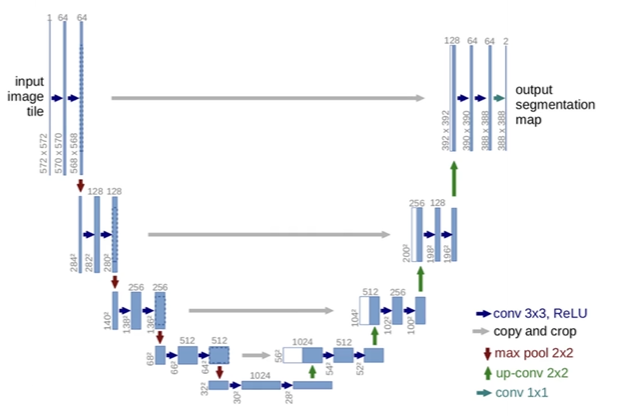

#### Encoder

##### Details for one encoder and one word

**FOR ONE ENCODER and FOR EACH WORD**

<font color='blue'>**TOKENISATION**</font>

A token vector is computed as the simple sum of:
- An **embedding** vector (lenght: 768, 512, 256 or ..)
- A **positional encoding** vector (same lenght) (to be precise: how to compute it)

Subword tokenisation > OOV Out Of Vocabulary words, capture morphological variations

Positional encoding > 
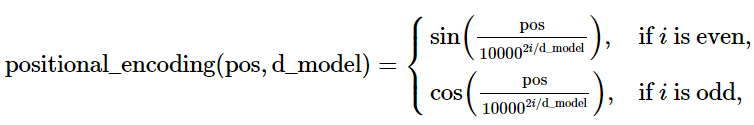

<font color='blue'>**SELF-ATTENTION**</font> (Q, K and V are the weights of the model)

The token vector is passed to the self-attention layer to compute the **value vector** 

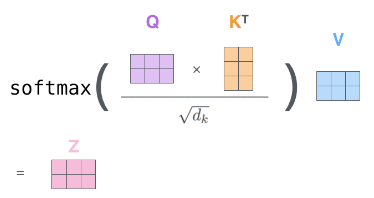

Lenght = nb of words in the sentence

1. **Dot product, scaling and softmax between Query and Key** > <font color='blue'>Similarity score</font>

How much each word related to the other words of the sentence (regarding the embeddings ... and the positionnal encoding !). 

**Scale**: division by sqrt(hidden_dimension of embedding) (scaling does not depend on the dot product scores of the other word in the sentence)


**Softmax**: normalization between 0 and 1 (normalization does depend on the dot product scores with the other words in the sentence) (i is the word we are computing. K is the nb of words in the sentence )

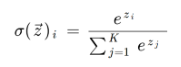



2. **Dot product with the value vector**

Update the embedding of the word to make it more aware of what is going on around him.

For a whole sentence, this makes an **attention matrix** (> orders of the words in sentences!)


3. **Sum**


<font color='blue'>**FEED-FORWARD**</font>

The value vector is then passed to a couple of dense layers to have the original lenght back (768, 512, 256, etc.) and is passed to the next encoder

##### Nb of weights and computational efforts

- 1 sentence of S words with embedding of lenght E > size (S, E)

- 3 matrix of weights (W_q, W_k, W_v) > size (E, X) (X is the kernel size?)

- 3 matrix q, k, v are of size (S, X)


The nb of weights does not depend on the size of the sentence

But the number of ops yes, and squared. It is heavier than a recurrent model

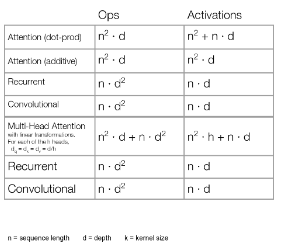

##### One encoder, single-headed attention (from scratch)

Nb of params for a sequence of 10 tokens, and embedding of 768 dim 
- embedding layer:          23.040
- self-attention layer:      4.614
- feed-forward layer:    2.347.776

In [255]:
!pip install -q jaxlib 
!pip install -q jax
!pip install -q pydot

from keras_nlp.layers import TokenAndPositionEmbedding
from tensorflow.keras.layers import Input, LayerNormalization, Dense, Embedding
from tensorflow.keras import Sequential, Model
import tensorflow as tf

Model: "model_6"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 sequence_of_10_tokens (Inp  [(None, 10)]                 0         []                            
 utLayer)                                                                                         
                                                                                                  
 pos_token_embed (TokenAndP  (None, 10, 768)              23040     ['sequence_of_10_tokens[0][0]'
 ositionEmbedding)                                                  ]                             
                                                                                                  
 query_projection (Dense)    (None, 10, 2)                1538      ['pos_token_embed[0][0]']     
                                                                                            

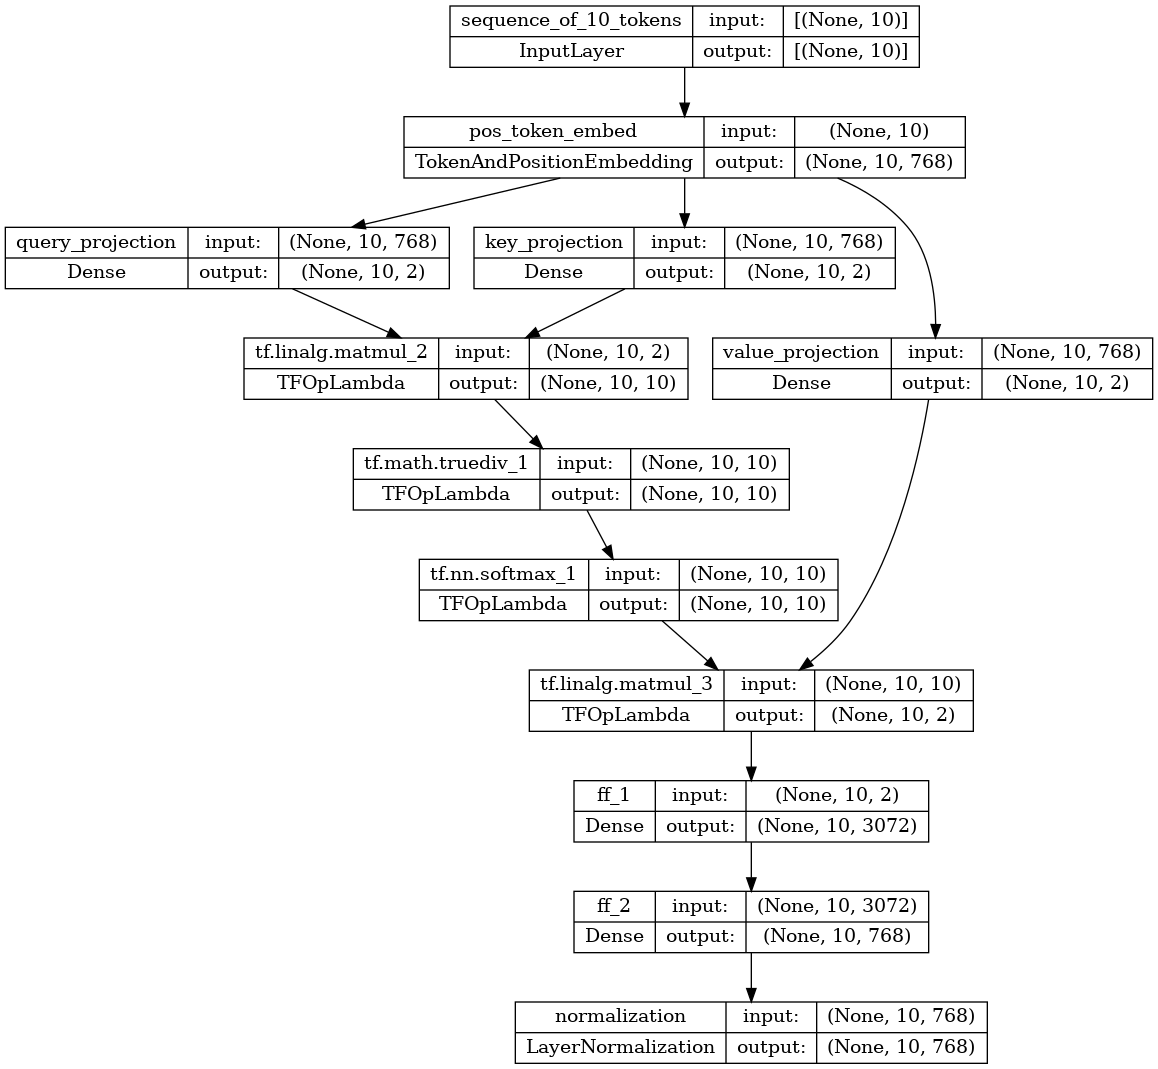

In [257]:
def init_one_encoder(embed_dim):
    
    # Input sequence of 10 tokens
    input_layer = Input(shape = (10,), name = "sequence_of_10_tokens")

    # Word and pos embeddings
    embedding_layer = TokenAndPositionEmbedding(20, 
                                                10, 
                                                embed_dim, 
                                                name = "pos_token_embed")(input_layer)

    # "Project" into query, key and value vectors
    query = Dense(2, name = "query_projection")(embedding_layer)
    key = Dense(2, name = "key_projection")(embedding_layer)
    value = Dense(2, name = "value_projection")(embedding_layer)

    # Scaled dot product Queries x Keys
    dot_product = tf.matmul(query, key, transpose_b=True, name = "dot_product_q_k")
    scaled_dot_product = dot_product / (embed_dim ** 0.5)

    # Softmax
    softmaxed = tf.nn.softmax(scaled_dot_product, name = "softmax")

    # Multiply by Values
    z = tf.matmul(softmaxed, value, name = "attention_matrix")
    
    # Some Dense layers and normalization
    ff_1 = Dense(4 * embed_dim, name = "ff_1")(z)
    ff_2 = Dense(embed_dim, name = "ff_2")(ff_1)
    ffn_output = tf.keras.layers.LayerNormalization(name = "normalization")(ff_2)

    # Model
    one_encoder = Model(inputs = input_layer, outputs = ffn_output)
    
    return one_encoder

one_encoder = init_one_encoder(768)
one_encoder.summary()
tf.keras.utils.plot_model(one_encoder,  show_shapes=True, show_layer_names=True)

##### One encoder, multiple-headed attention (from pre-trained model)

Differents heads grab differents relations between words

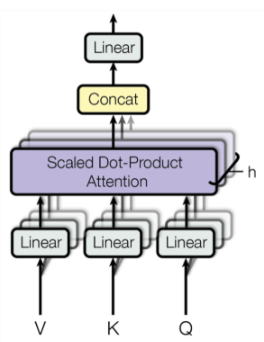

In [258]:
!pip install -q bertviz

In [259]:
from bertviz import head_view
from transformers import AutoModel, AutoTokenizer

In [260]:
model = AutoModel.from_pretrained("bert-base-uncased", 
                                  output_attentions = True)

first_sentence = "The lawyer worked on the case"
second_sentence = "I pushed shift to make the letters upper case"

tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")
viz_input = tokenizer(first_sentence, second_sentence, 
                      return_tensors = "pt")

attention = model(**viz_input).attentions

starter = (viz_input.token_type_ids == 0).sum(dim = 1)

tokens = tokenizer.convert_ids_to_tokens(viz_input.input_ids[0])

head_view(attention, tokens, starter, heads = [8])

<IPython.core.display.Javascript object>

#### Decoder

0. Input of the decoder = targets with mask (in order to learn)

1. **Masked multi-heads attention (target Q, K, V)**

2. **Masked multi-heads cross attention (target Q, source K, source V)**

https://towardsdatascience.com/transformers-explained-visually-part-3-multi-head-attention-deep-dive-1c1ff1024853

#####  Prediction principles

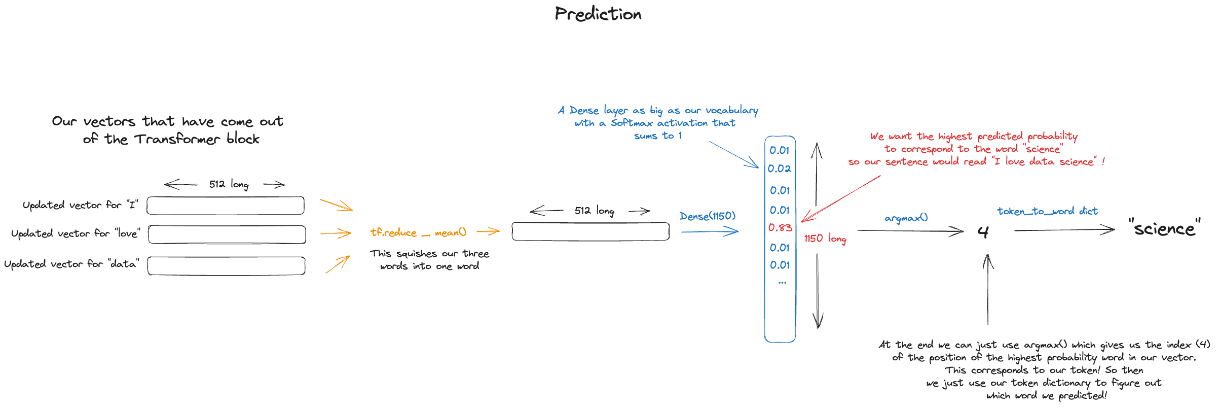

#####  <font color='blue'>Perplexity</font>

**Perplexity Explanation**

A lower perplexity value indicates that the language model is more confident and accurate in its predictions, as it assigns higher probabilities to the true words in the dataset. Conversely, a higher perplexity score suggests that the model is more uncertain and less accurate in its predictions.

Metric commonly used for models predicting the next word. 

Concept of cross-entropy.

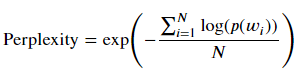
where 𝑁 represents the total number of words in the dataset, and (𝑝(𝑤𝑖)) is the probability assigned by the language model to the (𝑖)-th word in the sequence.

#####  Creation of X and y: <font color='blue'>Vectorisation and Masking</font>

In [202]:
!pip install -q keras-nlp
from tensorflow.keras.layers import TextVectorization
import tensorflow as tf

In [203]:
!mkdir -p data
!curl https://wagon-public-datasets.s3.amazonaws.com/data-science-images/lectures/Transformers/tickets.txt > data/tickets.txt

with open("data/tickets.txt", "r") as f:
    text = f.read()
    
tickets = text.split(" --- ")
tickets = [sentence + " EOS " for sentence in tickets]

max_len = max([len(ticket.split()) for ticket in tickets])
print(f"There are {len(tickets)} tickets in the dataset")
print(f"The longest ticket description is {max_len} words (including the 'EOS' word)")

tickets[0]

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  123k  100  123k    0     0   351k      0 --:--:-- --:--:-- --:--:--  351k
There are 372 tickets in the dataset
The longest ticket description is 56 words (including the 'EOS' word)


"I'm developing a sentiment analysis model for customer reviews, but I'm struggling with handling domain-specific language or sarcasm. What are some techniques like domain adaptation, transfer learning, or using pre-trained language models such as BERT or GPT-3 that can help me improve sentiment analysis performance on such challenging data? EOS "

In [204]:
print('\n------------------------ ADAPT A VECTORIZATION LAYER TO OUR TEXT ------------------------')
vvectorize_layer = TextVectorization(standardize = "lower",
                                    output_mode="int",
                                    output_sequence_length=max_len,
                                   )

vectorize_layer.adapt(tickets)
vocab = vectorize_layer.get_vocabulary()
vocab_size = len(vocab)
print(f"Lenght of the vocab: {vocab_size}")

vocab[:10]

print('\n------------------------ TOKENISE 1 sentence ------------------------')
sentence_as_tokens = vectorize_layer("Working with deep learning models is the best")
print(type(sentence_as_tokens))
print(sentence_as_tokens.shape)
print(f"Sentence as tokens: {sentence_as_tokens}")

print('\n------------------------ DE-TOKENISE 1 sentence ------------------------')
index_lookup = dict(zip(range(len(vocab)), vocab))
translated_back = [index_lookup[token] for token in sentence_as_tokens.numpy().tolist()]
print(f"Translation back: {translated_back}")

print('\n------------------------ TOKENISE multiple sentences ------------------------')
text_tokens = [vectorize_layer(sentence) for sentence in tickets]
print(type(text_tokens))
print(f"We obtain a list of {len(text_tokens)} tensors with shape of: {all_tokenized[0].shape} ")
print(f"Type of 1 sentence tokenized: {type(text_tokens[0])}")
print(f"1 sentence tokenized: {text_tokens[0]}")


------------------------ ADAPT A VECTORIZATION LAYER TO OUR TEXT ------------------------
Lenght of the vocab: 1150

------------------------ TOKENISE 1 sentence ------------------------
<class 'tensorflow.python.framework.ops.EagerTensor'>
(56,)
Sentence as tokens: [ 37  29  30  14  24 229  19 439   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0]

------------------------ DE-TOKENISE 1 sentence ------------------------
Translation back: ['working', 'with', 'deep', 'learning', 'models', 'is', 'the', 'best', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '']

------------------------ TOKENISE multiple sentences ------------------------
<class 'list'>
We obtain a list of 372 tensors with shape of: (56,) 


In [205]:
print('\n------------------------ CREATE X and Y with WORDS MASKING------------------------')

def X_y_creator(text):

    def X_y_creator_sentence(sentence):
        '''  Repeat the sentence and mask successively each word '''
        sentence = tf.expand_dims(sentence_tf, 0)
        sentence = tf.tile(sentence, (sentence.shape[1] - 1, 1))
        y = sentence[0, 1:]
        X = tf.linalg.band_part(sentence, -1, 0)
        return X, y

    Xs, ys = [], []
    
    for sequence in all_tokenized:
        X, y = X_y_creator(sequence)
        Xs.append(X)
        ys.append(y)

    X = tf.concat(Xs, axis = 0)
    y = tf.concat(ys, axis=0)

    print(f"X of shape {X.shape}")
    print(f"y of shape {y.shape}")

    X = X[y != 0]
    y = y[y != 0]

    print(f"X of shape {X.shape}")
    print(f"y of shape {y.shape}")

    return X, y

print(f"{len(text_tokens)} sentences")

X, y = X_y_creator(text_tokens)


------------------------ CREATE X and Y with WORDS MASKING------------------------
372 sentences
372 X of shape (55, 56)
372 y of shape (55,)
X of shape (20460, 56)
y of shape (20460,)
X of shape (17026, 56)
y of shape (17026,)


##### Model architecture: <font color='blue'>Positional Encoding, Word embedding and Multi-heads Attention</font>

In [206]:
from keras_nlp.layers import TokenAndPositionEmbedding
import tensorflow as tf

In [222]:
from tensorflow.keras import layers, Model, Sequential
import keras_nlp

class MultiHeadAttention(layers.Layer):
    def __init__(self, embed_dim, num_heads):
        super(MultiHeadAttention, self).__init__()
        self.num_heads = num_heads
        self.embed_dim = embed_dim
        self.projection_dim = embed_dim // num_heads
        self.query_dense = layers.Dense(embed_dim)
        self.key_dense = layers.Dense(embed_dim)
        self.value_dense = layers.Dense(embed_dim)
        self.combine_heads = layers.Dense(embed_dim)

    def attention(self, query, key, value):
        score = tf.matmul(query, key, transpose_b=True)
        divider = tf.cast( self.embed_dim ** 0.5 , tf.float32)
        scaled_score = score / divider
        weights = tf.nn.softmax(scaled_score, axis=-1)
        attention = tf.matmul(weights, value)        
        return attention, weights

    def separate_heads(self, x, batch_size):
        x = tf.reshape(x, (batch_size, 56, self.num_heads, self.projection_dim))
        return tf.transpose(x, perm=[0, 2, 1, 3])

    def call(self, inputs):
        # Here, we "project" into long query, key, value vectors
        query = self.query_dense(inputs)
        key = self.key_dense(inputs)
        value = self.value_dense(inputs)
        batch_size = tf.shape(query)[0]

        # We rearrange the projections for each head
        query = self.separate_heads(query, batch_size)
        key = self.separate_heads(key, batch_size)
        value = self.separate_heads(value, batch_size)

        # We perform attention on our QKV for our heads
        attention, weights = self.attention(query, key, value)
        attention = tf.transpose(attention, perm=[0, 2, 1, 3])
        concat_attention = tf.reshape(attention, (batch_size, -1, self.embed_dim))
        output = self.combine_heads(concat_attention)
        return output

class TransformerBlock(layers.Layer):
    def __init__(self, embed_dim, num_heads, ff_dim, rate=0.1):
        super(TransformerBlock, self).__init__()
        self.attention = MultiHeadAttention(embed_dim, num_heads)
        self.ffn = Sequential(
            [layers.Dense(ff_dim, activation="relu"), 
             layers.Dense(embed_dim)]
        )
        self.layernorm1 = layers.LayerNormalization(epsilon=1e-6)
        self.layernorm2 = layers.LayerNormalization(epsilon=1e-6)
        self.dropout1 = layers.Dropout(rate)
        self.dropout2 = layers.Dropout(rate)

    def call(self, inputs):
        attention_output = self.attention(inputs)
        attention_output = self.dropout1(attention_output)
        out1 = self.layernorm1(inputs + attention_output)
        ffn_output = self.ffn(out1)
        ffn_output = self.dropout2(ffn_output)
        return self.layernorm2(out1 + ffn_output)


In [223]:
def create_model(max_sequence_length, vocab_size, embedding_dimension):
    
    inputs = tf.keras.layers.Input(shape=(max_len,), dtype=tf.int32)
    
    x = TokenAndPositionEmbedding(vocab_size, 
                                  max_sequence_length, 
                                  embedding_dimension, 
                                  mask_zero = True)(inputs)
    
    x = TransformerBlock(num_heads = 4, 
                         embed_dim = embedding_dimension, 
                         ff_dim = embedding_dimension * 4)(x)

    x = tf.keras.layers.Dropout(0.4)(x)
        
    x = tf.reduce_mean(x, axis = 1)
#     x = tf.reduce_sum(x)                 # perform fairly equally than reduce mean
#     x = tf.keras.layers.Flatten()(x)     # perform fairly equally than reduce mean
    
    outputs = tf.keras.layers.Dense(vocab_size, activation='softmax')(x)
    
    model = tf.keras.Model(inputs=inputs, outputs=outputs)

    model.compile(
        optimizer="adam", 
        loss='sparse_categorical_crossentropy',
        metrics=[keras_nlp.metrics.Perplexity(), 'accuracy']
    )
    return model

In [227]:
decoder = create_model(56, 1150, 512)
decoder.summary()
# tf.keras.utils.plot_model(decoder,  show_shapes=True, show_layer_names=True)

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 56)]              0         
                                                                 
 token_and_position_embeddi  (None, 56, 512)           617472    
 ng_6 (TokenAndPositionEmbe                                      
 dding)                                                          
                                                                 
 transformer_block_5 (Trans  (None, 56, 512)           3152384   
 formerBlock)                                                    
                                                                 
 dropout_16 (Dropout)        (None, 56, 512)           0         
                                                                 
 tf.math.reduce_mean_4 (TFO  (None, 512)               0         
 pLambda)                                                  

In [226]:
es = EarlyStopping(patience=5, restore_best_weights=True)

# NO VAL HERE !! and very long to run
history = decoder.fit(X, 
                      y, 
                      batch_size=32, 
                      epochs = 25)

Epoch 1/25
533/533 [==============================] - 134s 246ms/step - loss: 4.7671 - perplexity: 117.5746 - accuracy: 0.1107
Epoch 2/25
533/533 [==============================] - 136s 256ms/step - loss: 3.0631 - perplexity: 21.3935 - accuracy: 0.3209
Epoch 3/25
533/533 [==============================] - 139s 261ms/step - loss: 2.1154 - perplexity: 8.2932 - accuracy: 0.5006
Epoch 4/25
533/533 [==============================] - 160s 300ms/step - loss: 1.5942 - perplexity: 4.9245 - accuracy: 0.6025
Epoch 5/25
533/533 [==============================] - 151s 284ms/step - loss: 1.2266 - perplexity: 3.4096 - accuracy: 0.6782
Epoch 6/25
533/533 [==============================] - 138s 259ms/step - loss: 0.9942 - perplexity: 2.7025 - accuracy: 0.7262
Epoch 7/25
533/533 [==============================] - 157s 294ms/step - loss: 0.8029 - perplexity: 2.2321 - accuracy: 0.7744
Epoch 8/25
533/533 [==============================] - 158s 297ms/step - loss: 0.6988 - perplexity: 2.0113 - accuracy: 0.79

In [247]:
plot_loss_metrics_woval(history, metric=['perplexity', 'accuracy'], title='Decoder history')

##### End of text generation

In [250]:
def generate(starter_string):

    for x in range(max_len - len(starter_string.split())):
        
        tokens = vectorize_layer(starter_string)
        token_expanded = tf.expand_dims(tokens, 0)
        
        pred = decoder.predict(token_expanded, verbose=0)
        index_pred = pred.argmax()
        word = index_lookup[index_pred]
        
        print(word)
        if word == "eos":
            return starter_string
        if len(starter_string.split()) == 55:
            return starter_string
        else:
            starter_string += f" {word} "

In [254]:
generate("I love data");

recurrent
recurrent
recurrent
recurrent
recurrent
recurrent
recurrent
recurrent
recurrent
recurrent
recurrent
recurrent
recurrent
recurrent
recurrent
recurrent
recurrent
recurrent
recurrent
recurrent
recurrent
recurrent
recurrent
recurrent
recurrent
recurrent
recurrent
recurrent
recurrent
recurrent
recurrent
recurrent
recurrent
recurrent
recurrent
recurrent
recurrent
recurrent
efficiency
efficiency
efficiency
efficiency
efficiency
efficiency
efficiency
efficiency
engineering,
engineering,
engineering,
engineering,
engineering,
engineering,
engineering,


## Encoder Decoder with class and TPU distribution

In [ ]:
tpu = tf.distribute.cluster_resolver.TPUClusterResolver.connect()
tpu_strategy = tf.distribute.TPUStrategy(tpu)
print ('Number of devices: {}'.format(tpu_strategy.num_replicas_in_sync))

In [ ]:
def get_angles(pos, i, d_model):
    angle_rates = 1 / np.power(10000, (2 * (i//2)) / np.float32(d_model))
    return pos * angle_rates

def positional_encoding(position, d_model):
    angle_rads = get_angles(np.arange(position)[:, np.newaxis], np.arange(d_model)[np.newaxis, :], d_model)
    angle_rads[:, 0::2] = np.sin(angle_rads[:, 0::2])
    angle_rads[:, 1::2] = np.cos(angle_rads[:, 1::2])
    pos_encoding = angle_rads[np.newaxis, ...]
    pos_encoding = tf.cast(pos_encoding, dtype=tf.float32)
    return pos_encoding

In [ ]:
def create_padding_mask_encoder(sequence):
    mask = tf.cast(tf.math.equal(sequence, 124), tf.float32)
    return mask[:, tf.newaxis, tf.newaxis, :]  # (batch_size, 1, 1, seq_len)

def create_padding_mask_decoder_basic(sequence, react):
    mask = tf.cast(tf.math.equal(react, IMPUTE_VALUE), tf.float32)
    return mask

def create_padding_mask_decoder(sequence, react):
    mask = create_padding_mask_decoder_basic(sequence, react)
    return mask[:, tf.newaxis, tf.newaxis, :]  # (batch_size, 1, 1, seq_len)

def create_look_ahead_mask(size):
    mask = 1 - tf.linalg.band_part(tf.ones((size, size)), -1, 0)
    return mask

def create_look_ahead_mask_with_padding(sequence, react):
    look_ahead_mask = create_look_ahead_mask(tf.shape(react)[1])
    dec_target_padding_mask = create_padding_mask_decoder(sequence, react)
    look_ahead_mask = tf.maximum(dec_target_padding_mask, look_ahead_mask)
    return look_ahead_mask

In [ ]:
def scaled_dot_product_attention(q, k, v, mask):
    matmul_qk = tf.matmul(q, k, transpose_b=True)  # (..., seq_len_q, seq_len_k)
    
    # scale matmul_qk
    dk = tf.cast(tf.shape(k)[-1], tf.float32)
    scaled_attention_logits = matmul_qk / tf.math.sqrt(dk)

    # add the mask to the scaled tensor.
    if mask is not None:
        scaled_attention_logits += (mask * -1e9)

    # softmax is normalized on the last axis (seq_len_k) so that the scores add up to 1.
    attention_weights = tf.nn.softmax(scaled_attention_logits, axis=-1)  # (..., seq_len_q, seq_len_k)

    output = tf.matmul(attention_weights, v)  # (..., seq_len_q, depth_v)

    return output, attention_weights

In [ ]:
class MultiHeadAttention(tf.keras.layers.Layer):
    def __init__(self, d_model, num_heads):
        super(MultiHeadAttention, self).__init__()
        self.num_heads = num_heads
        self.d_model = d_model

        assert d_model % self.num_heads == 0

        self.depth = d_model // self.num_heads

        self.wq = tf.keras.layers.Dense(d_model)
        self.wk = tf.keras.layers.Dense(d_model)
        self.wv = tf.keras.layers.Dense(d_model)

        self.dense = tf.keras.layers.Dense(d_model)

    def split_heads(self, x, batch_size):
        """Split the last dimension into (num_heads, depth).
        Transpose the result such that the shape is (batch_size, num_heads, seq_len, depth)
        """
        x = tf.reshape(x, (batch_size, -1, self.num_heads, self.depth))
        return tf.transpose(x, perm=[0, 2, 1, 3])

    def call(self, v, k, q, mask):
        batch_size = tf.shape(q)[0]

        q = self.wq(q)  # (batch_size, seq_len, d_model)
        k = self.wk(k)  # (batch_size, seq_len, d_model)
        v = self.wv(v)  # (batch_size, seq_len, d_model)
        
        q = self.split_heads(q, batch_size)  # (batch_size, num_heads, seq_len_q, depth)
        k = self.split_heads(k, batch_size)  # (batch_size, num_heads, seq_len_k, depth)
        v = self.split_heads(v, batch_size)  # (batch_size, num_heads, seq_len_v, depth)

        # scaled_attention.shape == (batch_size, num_heads, seq_len_q, depth)
        # attention_weights.shape == (batch_size, num_heads, seq_len_q, seq_len_k)
        scaled_attention, attention_weights = scaled_dot_product_attention(q, k, v, mask)

        scaled_attention = tf.transpose(scaled_attention, perm=[0, 2, 1, 3])  # (batch_size, seq_len_q, num_heads, depth)
        concat_attention = tf.reshape(scaled_attention, (batch_size, -1, self.d_model))  # (batch_size, seq_len_q, d_model)
        output = self.dense(concat_attention)  # (batch_size, seq_len_q, d_model)

        return output, attention_weights

In [ ]:
def point_wise_feed_forward_network(d_model, dff):
    return tf.keras.Sequential([
        tf.keras.layers.Dense(dff, activation='relu'),  # (batch_size, seq_len, dff)
        tf.keras.layers.Dense(d_model)  # (batch_size, seq_len, d_model)
    ])

In [ ]:
class EncoderLayer(tf.keras.layers.Layer):
    def __init__(self, d_model, num_heads, dff, rate=0.1):
        super(EncoderLayer, self).__init__()

        self.mha = MultiHeadAttention(d_model, num_heads)
        self.ffn = point_wise_feed_forward_network(d_model, dff)

        self.layernorm1 = tf.keras.layers.LayerNormalization(epsilon=1e-6)
        self.layernorm2 = tf.keras.layers.LayerNormalization(epsilon=1e-6)

        self.dropout1 = tf.keras.layers.Dropout(rate)
        self.dropout2 = tf.keras.layers.Dropout(rate)

    def call(self, x, training, mask):
        attn_output, _ = self.mha(x, x, x, mask)  # (batch_size, input_seq_len, d_model)
        attn_output = self.dropout1(attn_output, training=training)
        out1 = self.layernorm1(x + attn_output)  # (batch_size, input_seq_len, d_model)

        ffn_output = self.ffn(out1)  # (batch_size, input_seq_len, d_model)
        ffn_output = self.dropout2(ffn_output, training=training)
        out2 = self.layernorm2(out1 + ffn_output)  # (batch_size, input_seq_len, d_model)
        return out2

In [ ]:
class Encoder(tf.keras.layers.Layer):
    def __init__(self, num_layers, d_model, num_heads, dff, input_vocab_size, maximum_position_encoding, rate=0.1):
        super(Encoder, self).__init__()

        self.d_model = d_model
        self.num_layers = num_layers
        self.dff = dff

        self.embedding = tf.keras.layers.Embedding(input_vocab_size, d_model)
        self.pos_encoding = positional_encoding(maximum_position_encoding, self.d_model)

        self.enc_layers = [EncoderLayer(d_model, num_heads, dff, rate) for _ in range(num_layers)]
        self.dropout = tf.keras.layers.Dropout(rate)

    def call(self, x, training, mask):
        seq_len = tf.shape(x)[1]

        # adding embedding and position encoding.
        x = self.embedding(x)  # (batch_size, input_seq_len, d_model)
        x *= tf.math.sqrt(tf.cast(self.d_model, tf.float32))
        x += self.pos_encoding[:, :seq_len, :]

        x = self.dropout(x, training=training)

        for i in range(self.num_layers):
            x = self.enc_layers[i](x, training, mask)

        return x  # (batch_size, input_seq_len, d_model)

In [ ]:
class DecoderLayer(tf.keras.layers.Layer):
    def __init__(self, d_model, num_heads, dff, rate=0.1):
        super(DecoderLayer, self).__init__()

        self.mha1 = MultiHeadAttention(d_model, num_heads)
        self.mha2 = MultiHeadAttention(d_model, num_heads)

        self.ffn = point_wise_feed_forward_network(d_model, dff)

        self.layernorm1 = tf.keras.layers.LayerNormalization(epsilon=1e-6)
        self.layernorm2 = tf.keras.layers.LayerNormalization(epsilon=1e-6)
        self.layernorm3 = tf.keras.layers.LayerNormalization(epsilon=1e-6)

        self.dropout1 = tf.keras.layers.Dropout(rate)
        self.dropout2 = tf.keras.layers.Dropout(rate)
        self.dropout3 = tf.keras.layers.Dropout(rate)

    def call(self, x, enc_output, training, look_ahead_mask, padding_mask):
        # enc_output.shape == (batch_size, input_seq_len, d_model)

        attn1, attn_weights_block1 = self.mha1(x, x, x, look_ahead_mask)  # (batch_size, target_seq_len, d_model)
        attn1 = self.dropout1(attn1, training=training)
        out1 = self.layernorm1(attn1 + x)

        attn2, attn_weights_block2 = self.mha2(enc_output, enc_output, out1, padding_mask)  # (batch_size, target_seq_len, d_model)
        attn2 = self.dropout2(attn2, training=training)
        out2 = self.layernorm2(attn2 + out1)  # (batch_size, target_seq_len, d_model)

        ffn_output = self.ffn(out2)  # (batch_size, target_seq_len, d_model)
        ffn_output = self.dropout3(ffn_output, training=training)
        out3 = self.layernorm3(ffn_output + out2)  # (batch_size, target_seq_len, d_model)

        return out3, attn_weights_block1, attn_weights_block2

In [ ]:
class Decoder(tf.keras.layers.Layer):
    def __init__(self, num_layers, d_model, num_heads, dff, maximum_position_encoding, rate=0.1):                     ## target_vocab_size
        super(Decoder, self).__init__()

        self.d_model = d_model
        self.num_layers = num_layers

        self.pos_encoding = positional_encoding(maximum_position_encoding, d_model)
        
        self.dec_layers = [DecoderLayer(d_model, num_heads, dff, rate) for _ in range(num_layers)]
        self.dropout = tf.keras.layers.Dropout(rate)
        self.normalisation = tf.keras.layers.LayerNormalization(axis=1)

    def call(self, x, enc_output, training, look_ahead_mask, padding_mask):

        seq_len = tf.shape(x)[1]
        attention_weights = {}

        # Rescale between -1 and 1
        x = 2 * (x - 0.5)

        # Add positional encoding with a d_model dimension
        x = tf.expand_dims(x, axis=-1)
        x = tf.tile(x, [1, 1, self.d_model]) 
        x += self.pos_encoding[:, :seq_len, :]

        x = self.dropout(x, training=training)

        for i in range(self.num_layers):
            x, block1, block2 = self.dec_layers[i](x, enc_output, training, look_ahead_mask, padding_mask)
            attention_weights[f'decoder_layer{i+1}_block1'] = block1
            attention_weights[f'decoder_layer{i+1}_block2'] = block2

        # x.shape == (batch_size, target_seq_len, d_model)
        return x, attention_weights

In [ ]:
class Transformer(tf.keras.Model):
    def __init__(self, num_layers, d_model, num_heads, dff, input_vocab_size, pe_input, pe_target, rate):
        super().__init__()

        self.encoder = Encoder(num_layers, d_model, num_heads, dff, input_vocab_size, pe_input, rate/2)                           
        self.decoder = Decoder(num_layers, d_model, num_heads, dff, pe_target, rate)
        self.final_layer = tf.keras.layers.Dense(1)

    def call(self, inputs, training):
        inp = inputs[0]
        tar = inputs[1]
        enc_padding_mask, look_ahead_mask, dec_padding_mask = self.create_masks(inp, tar)
        
        enc_output = self.encoder(inp, training, enc_padding_mask)
        dec_output, attention_weights = self.decoder(tar, enc_output, training, look_ahead_mask, dec_padding_mask)
        final_output = self.final_layer(dec_output)
        final_output = tf.reduce_mean(final_output, axis=-1)
        
        return final_output, attention_weights

    def create_masks(self, inp, tar):
        # Encoder padding mask
        enc_padding_mask = create_padding_mask_encoder(inp)

        # Used in the 2nd attention block in the decoder.
        # This padding mask is used to mask the encoder outputs.
        dec_padding_mask = create_padding_mask_encoder(inp)

        # Used in the 1st attention block in the decoder.
        # It is used to pad and mask future tokens in the input received by
        # the decoder.
        look_ahead_mask = create_look_ahead_mask(tf.shape(tar)[1])
        dec_target_padding_mask = create_padding_mask_decoder(inp, tar)
        look_ahead_mask = tf.maximum(dec_target_padding_mask, look_ahead_mask)

        return enc_padding_mask, look_ahead_mask, dec_padding_mask

In [ ]:
class Predictor(tf.Module):
    def __init__(self, transformer):
        self.transformer = transformer

    def __call__(self, sequence, max_len):
        assert isinstance(sequence, tf.Tensor)
        
        encoder_input = sequence
        batchsize = encoder_input.shape[0]

        # Instanciate the output, with impute_value for the first and last 25 predictions
        output_impute_value = tf.fill((batchsize, 25), IMPUTE_VALUE)
        output = tf.concat([output_impute_value, tf.zeros((batchsize, max_len + 2 * (WINDOW-1) -50), dtype=tf.float32), output_impute_value], axis=1)
        
        # Prediction loop
        def while_cond(i, output):
            return i < max_len + 2 * (WINDOW-1) - 25

        def while_body(i, output):
            predictions, _ = self.transformer([encoder_input, output[:, :i]], training=False)
            output = tf.tensor_scatter_nd_update(output, indices=[(j, i) for j in range(batchsize)], updates=predictions[:, -1])
            return i+1, output

        _, output = tf.while_loop(while_cond, while_body, loop_vars=[25, output])
        
        # Reset to 0 the first and last 25 predictions
        output_zeros = tf.zeros((batchsize, 25), dtype=tf.float32)
        output = tf.tensor_scatter_nd_update(output, indices=[[(k, l) for l in range(25)] for k in range(batchsize)], updates=output_zeros)        
        output = tf.tensor_scatter_nd_update(output, indices=[[(k, l) for l in range(max_len + 2 * (WINDOW-1) -25, max_len + 2 * (WINDOW-1) )] for k in range(batchsize)], updates=output_zeros)        
        
        return output

In [ ]:
# Test masking on a sample
print('Shape of padding mask encoder', create_padding_mask_encoder(sequence_dms[:256]).shape)
print('Shape of padding mask decoder', create_padding_mask_decoder(sequence_dms[:256], react_dms[:256]).shape)
print('Shape of lookahead mask alone', create_look_ahead_mask(461).shape)
print('Shape of lookahead mask with padding mask decoder -- full react', create_look_ahead_mask_with_padding(sequence_dms[:256], react_dms[:256]).shape)
print('Shape of lookahead mask with padding mask decoder -- partial react', create_look_ahead_mask_with_padding(sequence_dms[:256], react_dms[:256, :50]).shape)

In [ ]:
# # Test model architecture on a sample
# input_vocab_size = len(window_encoding_table(WINDOW)[1])
# maximum_position_encoding = LEN_MAX + 2*(WINDOW-1)
# pe_input = LEN_MAX + 2*(WINDOW-1)
# pe_target = LEN_MAX + 2*(WINDOW-1)

# sample_encoder = Encoder(num_layers=num_layers, d_model=d_model, num_heads=num_heads, dff=dff, input_vocab_size=input_vocab_size, maximum_position_encoding=maximum_position_encoding, rate=dropout_rate)
# sample_decoder = Decoder(num_layers=num_layers, d_model=d_model, num_heads=num_heads, dff=dff, maximum_position_encoding=maximum_position_encoding)
# sample_transformer = Transformer(num_layers=num_layers, d_model=d_model, num_heads=num_heads, dff=dff, input_vocab_size=input_vocab_size, pe_input=pe_input, pe_target=pe_target, rate=dropout_rate)
# sample_predictor = Predictor(sample_transformer)

# # encoder_output = sample_encoder(dataset_train_iter[0], training=False, mask=None)
# # encoder_output_with_mask = sample_encoder(dataset_train_iter[0], training=False, mask=create_padding_mask_encoder(dataset_train_iter[0]))
# # print('encoder_output shape without and with mask:', encoder_output.shape, encoder_output_with_mask.shape)

# # decoder_output, _ = sample_decoder(dataset_train_iter[1], enc_output=encoder_output, training=False, look_ahead_mask=None, padding_mask=None)
# # decoder_output_with_mask, _ = sample_decoder(dataset_train_iter[1], enc_output=encoder_output, training=False, look_ahead_mask=create_look_ahead_mask_with_padding(dataset_train_iter[0], dataset_train_iter[1]), padding_mask=create_padding_mask_encoder(dataset_train_iter[0]))
# # print('decoder_output shape without and with mask:', decoder_output.shape, decoder_output_with_mask.shape)

# # start_time = time.time()
# # final_output, _ = sample_transformer([dataset_train_iter[0], dataset_train_iter[1]], training=False)
# # print('final_output shape with mask - complete prediction:', final_output.shape, f"{time.time()-start_time:0.2f}s")

# # start_time = time.time()
# # final_output, _ = sample_transformer([dataset_train_iter[0], dataset_train_iter[1][:, :206]], training=False)
# # print('final_output shape with mask - partial prediction:', final_output.shape, f"{time.time()-start_time:0.2f}s")

# start_time = time.time()
# prediction = sample_predictor(dataset_train_iter[0], max_len)
# print('Prediction from predictor:', prediction.shape, f"{time.time()-start_time:0.2f}s")

# # Print the model summary
# sample_transformer.summary()

In [ ]:
class CustomSchedule(tf.keras.optimizers.schedules.LearningRateSchedule):
    def __init__(self, d_model, warmup_steps=warmup_steps):
        super(CustomSchedule, self).__init__()
        self.d_model = d_model
        self.d_model = tf.cast(self.d_model, tf.float32)
        self.warmup_steps = warmup_steps

    def __call__(self, step):
        step = tf.cast(step, tf.float32)
        arg1 = tf.math.rsqrt(step)
        arg2 = step * (self.warmup_steps ** -1.5)
        return tf.math.rsqrt(self.d_model) * tf.math.minimum(arg1, arg2)

In [ ]:
def loss_function(inp, real, pred):
    mask = 1 - create_padding_mask_decoder_basic(inp, real)
    real_masked = real * mask
    pred_masked = pred * mask
    loss_ = loss_object(real_masked, pred_masked)
    return loss_

def metric_function(inp, real, pred):
    mask = 1 - create_padding_mask_decoder_basic(inp, real)
    mask = mask[:, :max_len]
    real_masked = tf.clip_by_value(real[:, :max_len] * mask, clip_value_min=0, clip_value_max=1)
    pred_masked = tf.clip_by_value(pred[:, :max_len] * mask, clip_value_min=0, clip_value_max=1)
    metric_ = metric_object(real_masked, pred_masked)
    return metric_

In [ ]:
train_step_signature = [tf.TensorSpec(shape=(batchsize_train, LEN_MAX + 2*(WINDOW-1)), dtype=tf.int32),
                        tf.TensorSpec(shape=(batchsize_train, LEN_MAX + 2*(WINDOW-1)), dtype=tf.float32)]

@tf.function(input_signature=train_step_signature)
def train_step(inp, tar):
    tar_inp = tar[:, :-1]
    tar_real = tar[:, 1:]

    with tf.GradientTape() as tape:
        prediction, _ = transformer([inp, tar_inp], training = True)
        loss = tf.nn.compute_average_loss(loss_function(inp, tar_real, prediction))

    gradients = tape.gradient(loss, transformer.trainable_variables)
    optimizer.apply_gradients(zip(gradients, transformer.trainable_variables))
    return loss
    
@tf.function
def distributed_train_step(inp, tar):
    per_replica_losses = tpu_strategy.run(train_step, args=(inp, tar,))
    return tpu_strategy.reduce(tf.distribute.ReduceOp.SUM, per_replica_losses, axis=None)

In [ ]:
@tf.function
def val_predictor(inp, tar):
    pred = predictor(inp, max_len)
    metric = metric_function(inp, tar, pred)
    return metric

@tf.function
def distributed_val_predictor(inp, tar):
    per_replica_metric = tpu_strategy.run(val_predictor, args=(inp, tar,))
    return tpu_strategy.reduce(tf.distribute.ReduceOp.MEAN, per_replica_metric, axis=None)

In [ ]:
def val_loop(sample_size):
    dataset_val_iter = next(iter(dataset_val))
    total_metric = distributed_val_predictor(dataset_val_iter[0], dataset_val_iter[1])
    start_val = time.time()
    
    batchsize = dataset_val_iter[0].shape[0]
            
    dataset_val.shuffle(buffer_size=100)
    for batch_val, dataset_batch_val in enumerate(dataset_val):
        total_metric += distributed_val_predictor(dataset_batch_val[0], dataset_batch_val[1])
        if batch_val == sample_size: break
    val_metric = total_metric / (batch_val + 1)
    
    print("{:<30}{:<30}{:<30}{:<30}".format(" ", 
                                            " ", 
                                            f"Val metric {val_metric:.4f}",
                                            f"Val dur.: {time.time() - start_val:.0f} secs\033[0m"))
    
    return val_metric

In [ ]:
with tpu_strategy.scope():
    input_vocab_size = len(window_encoding_table(WINDOW)[1])
    pe_input = LEN_MAX+2*(WINDOW-1)
    pe_target = LEN_MAX+2*(WINDOW-1)

    transformer = Transformer(num_layers=num_layers, d_model=d_model, num_heads=num_heads, dff=dff, 
                              input_vocab_size=input_vocab_size, pe_input=pe_input, pe_target=pe_target, rate=dropout_rate)
    predictor = Predictor(transformer)
    
    learning_rate = CustomSchedule(d_model)
    optimizer = tf.keras.optimizers.Adam(learning_rate, beta_1=0.9, beta_2=0.98, epsilon=1e-9)
        
    checkpoint_path = f"./ckpt_{model_name}"
    ckpt = tf.train.Checkpoint(transformer=transformer, optimizer=optimizer)
    ckpt_manager = tf.train.CheckpointManager(ckpt, checkpoint_path, max_to_keep=5)

    # if a checkpoint exists, restore the latest checkpoint.
    if ckpt_manager.latest_checkpoint:
        ckpt.restore(ckpt_manager.latest_checkpoint)
        print('Latest checkpoint restored!!')
        
    loss_object = tf.keras.losses.MeanAbsoluteError(reduction='none')
    metric_object = tf.keras.metrics.MeanAbsoluteError()

In [ ]:
print(datetime.now(pytz.timezone('Europe/Paris')).strftime('%H:%M'))
history = {'train_loss': [], 'val_metric':[], 'epoch': []}

for epoch in range(EPOCHS):

    print(f"\033[1mProcessing Epoch {epoch + 1}\033[0m")  
    start = time.time()
    
    # TRAIN LOOP
    dataset_train_iter = next(iter(dataset_train))
    total_loss = distributed_train_step(dataset_train_iter[0], dataset_train_iter[1])
    
    for batch_train, dataset_batch_train in enumerate(dataset_train):
        
        total_loss += distributed_train_step(dataset_batch_train[0], dataset_batch_train[1])
        
        if batch_train % 100 == 0: 
            print("{:<30}{:<30}".format(f"-- batch {batch_train}", f"Train loss {total_loss / (batch_train + 1):.4f}"))
        
        if batch_train % 400 == 0:
            val_metric = val_loop(16)
    
    train_loss = total_loss / (batch_train + 1)
    val_metric = val_loop(32)

    # SAVING MODEL CHECKPOINT
    ckpt_save_path = ckpt_manager.save()
    print(f"\033[94m Checkpoint saved \033[0m")

    # SAVING LOCAL HISTORY DICT
    history['epoch'].append(epoch + 1)
    history['val_metric'].append(val_metric)
    history['train_loss'].append(train_loss)
    
    # PRINT EPOCH PERFORMANCE
    print("{:<30}{:<30}{:<30}{:<30}".format(f"\033[94m Epoch {epoch + 1}", 
                                                  f"Train loss {train_loss:.4f}",  
                                                  f"Val metric {val_metric:.4f}", 
                                                  f"Epoch dur.: {time.time() - start:.0f} secs"))
    
#     EARLY STOPPING
#     if epoch == 3:
#         transformer.save(f"saved_model/{model_name}")
#         break
#     if epoch >= patience: 
#         should_continue = any([val + delta <= history['val_metric'][-patience] for val in history['val_metric'][-patience+1:]])
#         if not should_continue: 
#             transformer.save(f"saved_model/{model_name}")
#             break
    
print(datetime.now(pytz.timezone('Europe/Paris')).strftime('%H:%M'))

## Encoder model with tensorflow librairy

In [ ]:
def get_angles(pos, i, d_model):
    angle_rates = 1 / np.power(10000, (2 * (i//2)) / np.float32(d_model))
    return pos * angle_rates

def positional_encoding(position, d_model):
    angle_rads = get_angles(np.arange(position)[:, np.newaxis], np.arange(d_model)[np.newaxis, :], d_model)
    angle_rads[:, 0::2] = np.sin(angle_rads[:, 0::2])
    angle_rads[:, 1::2] = np.cos(angle_rads[:, 1::2])
    pos_encoding = angle_rads[np.newaxis, ...]
    pos_encoding = tf.cast(pos_encoding, dtype=tf.float32)
    return pos_encoding

def create_padding_mask_encoder(sequence):
    mask = tf.cast(tf.math.equal(sequence, encoded_padded_value), tf.float32)
    return mask[:, tf.newaxis, tf.newaxis, :]  # (batch_size, 1, 1, seq_len)

In [ ]:
def create_encoder():
    
    # Input Layer
    inp = tf.keras.layers.Input(shape=dataset_train_iter[0].shape[1], batch_size=dataset_train_iter[0].shape[0])

    # Local variables for embedding
    input_vocab_size = len(window_encoding_table(WINDOW)[1])
    encoded_padded_value = window_encoding_table(WINDOW)[0].lookup(tf.constant('E' * WINDOW)).numpy()
    maximum_position_encoding = LEN_MAX + 2 * (WINDOW-1)
    seq_len = inp.shape[1]
    pos_encoding = positional_encoding(maximum_position_encoding, d_model)
    enc_padding_mask = create_padding_mask_encoder(inp)
    
    # Embedding and Positionnal encoding
    x = tf.keras.layers.Embedding(input_vocab_size, d_model)(inp)
    x *= tf.math.sqrt(tf.cast(d_model, tf.float32))
    x += pos_encoding[:, :seq_len, :]
    x = tf.keras.layers.Dropout(rate)(x)
    
    # Loop on Encoder blocks
    for i in range(num_layers):
        
        # Multi head attention with padding mask
        attn_output, _ = tf.keras.layers.MultiHeadAttention(num_heads=num_heads, key_dim=d_model)(query=x, key=x, value=x, attention_mask=enc_padding_mask, return_attention_scores=True)
        attn_output = tf.keras.layers.Dropout(rate)(attn_output)
        mha_output = tf.keras.layers.LayerNormalization(epsilon=1e-6)(x + attn_output)
        
        # Feed Forward
        ffn_output = tf.keras.layers.Dense(dff, activation='relu')(mha_output)
        ffn_output = tf.keras.layers.Dense(d_model)(ffn_output)
        ffn_output = tf.keras.layers.Dropout(rate)(ffn_output)
        
        # Normalisation
        x = tf.keras.layers.LayerNormalization(epsilon=1e-6)(out1 + ffn_output)
        
    # Last layer
    out = tf.keras.layers.Dense(1)(x)
    out = tf.reduce_mean(out, axis=-1)
    
    # Local variables for prediction adjustments
    batchsize = dataset_train_iter[0].shape[0]
    out_zeros = tf.zeros((batchsize, 25), dtype=tf.float32)

    # Last prediction adjustments
    out = out[:, WINDOW-1: out.shape[1]-(WINDOW-1)]
    out = tf.tensor_scatter_nd_update(out, indices=[[(k, l) for l in range(25)] for k in range(batchsize)], updates=out_zeros)        
    out = tf.tensor_scatter_nd_update(out, indices=[[(k, l) for l in range(LEN_MAX-25, LEN_MAX)] for k in range(batchsize)], updates=out_zeros)        
    
    model = tf.keras.Model(inputs=inp, outputs=out)
    
    return model

In [ ]:
class CustomSchedule(tf.keras.optimizers.schedules.LearningRateSchedule):
    def __init__(self, d_model, warmup_steps=6000):
        super(CustomSchedule, self).__init__()
        self.d_model = d_model
        self.d_model = tf.cast(self.d_model, tf.float32)
        self.warmup_steps = warmup_steps

    def __call__(self, step):
        step = tf.cast(step, tf.float32)
        arg1 = tf.math.rsqrt(step)
        arg2 = step * (self.warmup_steps ** -1.5)
        return tf.math.rsqrt(self.d_model) * tf.math.minimum(arg1, arg2)
    
    def get_config(self):
        return {
            'd_model': self.d_model.numpy(),
            'warmup_steps': self.warmup_steps
        }

In [ ]:
learning_rate = CustomSchedule(d_model)
optimizer = tf.keras.optimizers.Adam(learning_rate, beta_1=0.9, beta_2=0.98, epsilon=1e-9)
es = tf.keras.callbacks.EarlyStopping(patience=4, restore_best_weights=True, monitor='val_loss', min_delta=0.0001, mode='auto', verbose=0)
ckpt = tf.keras.callbacks.ModelCheckpoint(f"ckpt_{model_name}", monitor="val_loss", mode='auto', save_freq='epoch', save_best_only=True, save_weights_only=False, verbose=0)

In [ ]:
with tpu_strategy.scope():
    encoder = create_encoder()
    encoder.compile(optimizer=optimizer, loss='mae', metrics='mae')
#     encoder.summary()

In [ ]:
with tpu_strategy.scope():
    history = encoder.fit(dataset_train, validation_data=dataset_val, shuffle=True, epochs=100, callbacks=[es, ckpt], verbose = 1)

## Pre-trained models

##### Family models

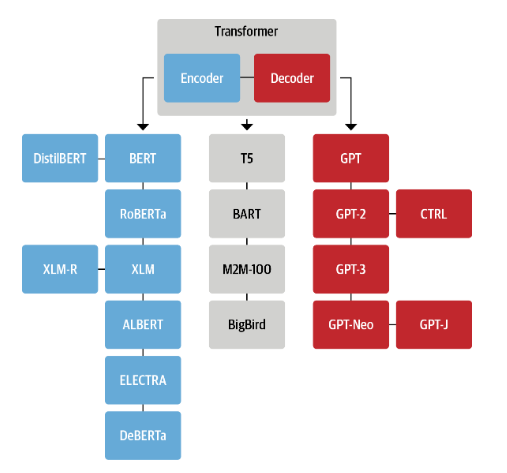

##### Initialization

In [ ]:
!pip install -q transformers torch pytesseract
!pip install -q sentencepiece sacremoses

In [ ]:
from transformers import pipeline

In [ ]:
import requests 
from bs4 import BeautifulSoup

data = requests.get("https://www.bbc.com/news/uk-wales-66385544")
some_text = BeautifulSoup(data.content).find("article").text
len(some_text)

##### Hugging Face Syntax

https://huggingface.co/docs/transformers/main_classes/pipelines

In [ ]:
pipe = pipeline(
    'translation',                           # 
    model = 'Helsinki-NLP/opus-mt-en-fr'     # model, 
)

result = pipe("I am a student and I am studying in London")

result[0]['translation_text']

##### Sentiment analysis - <font color='blue'>Distilbert, Roberta, ...</font>

In [ ]:
# Default model, trained on a fairly limited corpus of tex
# pipe = pipeline('sentiment-analysis', model = 'distilbert-base-uncased-finetuned-sst-2-english')

# Specialized on Twitter sentiment
pipe = pipeline('sentiment-analysis', model = 'cardiffnlp/twitter-roberta-base-sentiment-latest')
print(pipe('This was frankly a spectacular failure from start to finish, with remarkably uninspired performances from some very well-paid actors who acted with all the passion of a wet biscuit'))

# Specialized on korean
pipe = pipeline("text-classification", model="matthewburke/korean_sentiment")
pipe("이것은 솔직히 처음부터 끝까지 엄청난 실패였으며 릴리 패드에 앉아있는 두꺼비의 모든 열정으로 놀랍도록 영감을 얻지 못한 성능으로 끝났습니다.")

##### Sentiment analysis and fine tuning - <font color='blue'>Bert-tiny, Bert-small, ...</font>

https://huggingface.co/docs/transformers/v4.33.0/en/model_doc/auto#transformers.AutoTokenizer.from_pretrained.example

https://jalammar.github.io/illustrated-bert/

BERT gets trained via "semi-supervised" learning to predict the missing word in a sentence, looking both to its left and right as its context (hence it is named a "bidirectional" encoder). This means that it can see everything on either side of the masked word below.



In [ ]:
from transformers import AutoTokenizer, TFAutoModel
import pandas as pd
import tensorflow as tf

import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("data/imdb.csv")

###### Tokenisation

In [ ]:
tokenizer = AutoTokenizer.from_pretrained('prajjwal1/bert-tiny', 
                                          padding_side = 'right')


print('\n------------------------ TOKENS ------------------------')
tokens = tokenizer('My tokenizers and model must match')

print(tokens)
print(f"\n{type(tokens)}")
print(f"lenght: {len(tokens)}")
print(f"input_ids length: {len(tokens['input_ids'])}")
print(f"token_type_ids length: {len(tokens['token_type_ids'])}")
print(f"attention_mask length: {len(tokens['attention_mask'])}")


print('\n------------------------ DECODED TOKENS ------------------------')
for x in tokens["input_ids"]:
    print(f"input_ids {x} corresponds to {tokenizer.decode(x)}")
    
print('\n------------------------  TENSOR TOKENS ------------------------')
tf_tokens = tokenizer("My model and my tokenizer must match", 
                      return_tensors="tf")

print(f"{type(tf_tokens)}")
print(f"lenght: {len(tf_tokens)}")
print(f"input_ids shape: {tf_tokens['input_ids'].shape}")
print(f"token_type_ids shape: {tf_tokens['token_type_ids'].shape}")
print(f"attention_mask shape: {tf_tokens['attention_mask'].shape}")

print('\n------------------------  INPUT TENSOR TOKENS ------------------------')
# Get individual tensors from the batch. So batch size is 1
input_tensor = tf.expand_dims(tf_tokens['input_ids'][0], 0)

print(f"{type(input_tensor)}")
print(f"input_ids shape: {input_tensor.shape}")

In [ ]:
print('\n------------------------ MULTIPLE SENTENCES TENSOR TOKENS ------------------------')

df["tokenized"] = df["text"].map(lambda x: tokenizer(x)["input_ids"])
df["len_tokenized"] = df["tokenized"].map(lambda x: len(x))

fig, ax = plt.subplots(figsize=(10,2))
sns.histplot(data=df["len_tokenized"], kde=True, bins=20, shrink=0.8, edgecolor=None, ax=ax);
ax.grid(axis="both", lw=0.5, ls=':')
ax.spines[['right', 'top']].set_visible(False)

tf_tokens_long = tokenizer(df["text"].tolist(), 
                           max_length=500, 
                           padding = "max_length", 
                           truncation = True, 
                           return_tensors="tf")

print(f"{type(tf_tokens_long)}")
print(f"lenght: {len(tf_tokens_long)}")
print(f"input_ids shape: {tf_tokens_long['input_ids'].shape}")
print(f"token_type_ids shape: {tf_tokens_long['token_type_ids'].shape}")
print(f"attention_mask shape: {tf_tokens_long['attention_mask'].shape}")

print('\n------------------------ MULTIPLE SENTENCES INPUT TENSOR (shortened to ease pred) ------------------------')
input_tf_lg = tf_tokens_long['input_ids'][0:1000]

print(f"{type(input_tf_lg)}")
print(f"input_ids shape: {input_tf_lg.shape}")

###### Model and BERT prediction

In [ ]:
model_tiny = TFAutoModel.from_pretrained("prajjwal1/bert-tiny", 
                                         from_pt = True)

model_small = TFAutoModel.from_pretrained("prajjwal1/bert-small", 
                                          from_pt = True)

outputs_tiny = model_tiny.predict(input_tensor)
outputs_small = model_small.predict(input_tensor)

print('\n------------------------ TINY BERT (on 1 sentence) ------------------------')
print(f"Params: {round(model_tiny.num_parameters()/1000000, 1)} M")
print(f"\nPrediction shape: {outputs_tiny.last_hidden_state.shape}")
print(f"-- Batch size: {outputs_tiny.last_hidden_state.shape[0]}")
print(f"-- Tokens: {outputs_tiny.last_hidden_state.shape[1]}")
print(f"-- Embedding lenght: {outputs_tiny.last_hidden_state.shape[2]}")
print(f"\nShape of the CLS vector: {outputs_tiny.last_hidden_state[:, 0, :].shape}")

print('\n------------------------ SMALL BERT (on 1 sentence) ------------------------')
print(f"Params: {round(model_small.num_parameters()/1000000, 1)} M")
print(f"\nPrediction shape: {outputs_small.last_hidden_state.shape}")
print(f"-- Batch size: {outputs_small.last_hidden_state.shape[0]}")
print(f"-- Tokens: {outputs_small.last_hidden_state.shape[1]}")
print(f"-- Embedding lenght: {outputs_small.last_hidden_state.shape[2]}")

print(f"\nShape of the CLS vector: {outputs_small.last_hidden_state[:, 0, :].shape}")

In [ ]:
model_tiny = TFAutoModel.from_pretrained("prajjwal1/bert-tiny", 
                                         from_pt = True)

outputs_tiny_lg = model_tiny.predict(input_tf_lg)

print('\n------------------------ TINY BERT (multiple sentences) ------------------------')
print(f"Params: {round(model_tiny.num_parameters()/1000000, 1)} M")
print(f"\nPrediction shape: {outputs_tiny_lg.last_hidden_state.shape}")
print(f"-- Batch size: {outputs_tiny_lg.last_hidden_state.shape[0]}")
print(f"-- Tokens: {outputs_tiny_lg.last_hidden_state.shape[1]}")
print(f"-- Embedding lenght: {outputs_tiny_lg.last_hidden_state.shape[2]}")

###### Reduce data and apply BERT prediction to our case

In [ ]:
from sklearn.model_selection import train_test_split
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten

In [ ]:
print('------------------------ REDUCE DATA ------------------------')

print(f"Our X is the CLS vector of the last hidden state of Tiny Bert")
print(f"-- Shape of the CLS vector: {outputs_tiny_lg.last_hidden_state[:, 0, :].shape}")
print(f"y is our desired labels")

X = outputs_tiny_lg.last_hidden_state[:, 0, :]

print('\n------------------------ USUAL SPLIT, COMPILE and FIT with a DENSE ------------------------')

X_train, X_test, y_train, y_test = train_test_split(X, df["label"].iloc[0:len(X)])

dense_model = Sequential([
    Dense(256, activation='relu', input_shape=(128,)),
    Flatten(),
    Dense(1, activation='sigmoid')
])

dense_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = dense_model.fit(X_train, 
                          y_train, 
                          validation_split=0.2, 
                          epochs=20, 
                          verbose=0)

print('\n------------------------ EVALUATION ------------------------')
dense_model.evaluate(X_test, y_test)
plot_loss_metric(history, metric='accuracy', title='Tiny Bert without Fine Tunning')

###### Fine tuning BERT

In [ ]:
from transformers import TFAutoModelForSequenceClassification

In [ ]:
print('\n------------------------ USUAL SPLIT ------------------------')
X_train = input_tf_lg[:round(len(input_tf_lg)*0.8)]
X_test = input_tf_lg[round(len(input_tf_lg)*0.8):]

y_train = df["label"][:round(len(input_tf_lg)*0.8)]
y_test = df["label"][round(len(input_tf_lg)*0.8):len(input_tf_lg)]

print('\n------------------------ SPECIFIC TINY BERT MODEL FOR FINE TUNING ------------------------')
tuning_model = TFAutoModelForSequenceClassification.from_pretrained("prajjwal1/bert-tiny", 
                                                                    from_pt = True)

optimizer = tf.optimizers.Adam(learning_rate=0.01)

tuning_model.compile(optimizer = optimizer, metrics= "accuracy")

history_finetuned = tuning_model.fit(input_tf_lg, 
                                     df["label"], 
                                     validation_split=0.2, 
                                     batch_size=32, 
                                     epochs=5, 
                                     verbose=0)

print('\n------------------------ EVALUATION ------------------------')
tuning_model.evaluate(X_test, y_test)
plot_loss_metric(history_finetuned, metric='accuracy', title='Tiny Bert Fine Tunning')

##### Translation - <font color='blue'>opus-mt</font> project from the University of Helsinki

**opus-mt** project from the University of Helsinki

model = **'Helsinki-NLP/opus-mt-\<source-language\>-\<destination-language\>'**

In [ ]:
# pipe = pipeline("translation", model="Helsinki-NLP/opus-mt-en-fr")
# pipe = pipeline("translation", model="Helsinki-NLP/opus-mt-en-es")
# pipe = pipeline("translation", model="Helsinki-NLP/opus-mt-es-en")
pipe = pipeline("translation", model="Helsinki-NLP/opus-mt-en-it")

result = pipe("I am a student and I am studying in London")

result[0]['translation_text']

##### Summarization - <font color='blue'>BART</font>

Combine BERT + an autoregressiv model (style GPT)

https://www.projectpro.io/article/transformers-bart-model-explained/553

In [ ]:
# distilbart-xsum-12-6 is one of the smallest distillations available
pipe = pipeline('summarization', model='sshleifer/distilbart-xsum-12-6')

pipe(some_text)

##### Question answering - <font color='blue'>Roberta</font>

answer a question about a provided context

In [ ]:
pipe = pipeline("question-answering", model="deepset/roberta-base-squad2")

pipe(
    question = "How much money did she raise?",
    context = some_text
)

##### Speech to text / transcription - <font color='blue'>Whisper</font> by OpenAI

open source Whisper model made by OpenAI 

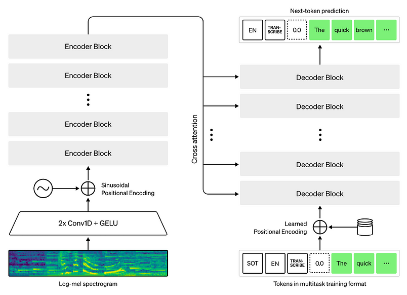

In [ ]:
import IPython
#!sudo apt install ffmpeg
!mkdir data
!curl https://wagon-public-datasets.s3.amazonaws.com/deep_learning_datasets/harvard.wav > data/harvard.wav

In [ ]:
IPython.display.Audio("data/harvard.wav")

In [ ]:
# pipe = pipeline("automatic-speech-recognition", model="openai/whisper-tiny")
# pipe("data/harvard.wav")

##### Multi-modal: Visual Question Answering - <font color='blue'>impira</font>

In [ ]:
!pip install -q Pillow pytesseract
# !sudo apt install tesseract-ocr  
# !sudo apt install libtesseract-dev

In [ ]:
pipe = pipeline(
    'document-question-answering',
    model = 'impira/layoutlm-invoices',
)

url = 'https://wagon-public-datasets.s3.amazonaws.com/data-science-images/lectures/Transformers/receipt.webp'

pipe(url,
     'When was this paid for?'
)

##### NLP decoder - <font color='blue'>Bloom</font>

In [ ]:
from transformers import AutoTokenizer, AutoModelForCausalLM

In [ ]:
# Load the tokenizer and model
tokenizer = AutoTokenizer.from_pretrained("bigscience/bloom-560m")
model = AutoModelForCausalLM.from_pretrained("bigscience/bloom-560m")

In [ ]:
# Set the maximum length for generated text
max_length = 40

# Set the initial prompt
prompt = "This lecture was"

# Encode the prompt
input_ids = tokenizer.encode(prompt, return_tensors="pt")

# Generate text
output = model.generate(input_ids, max_length=max_length, num_return_sequences=1)

# Decode and print the generated text
generated_text = tokenizer.decode(output[0], skip_special_tokens=True)
print(generated_text)

##### Vision Transformers - VIT, for images

##### <font color='blue'>Llama</font> from Meta

In [ ]:
llama_tokenizer = AutoTokenizer.from_pretrained("TheBloke/llama-2-70b-Guanaco-QLoRA-fp16")
llama_tokenizer("My tokenizers and model must match")

##### Clean up

empty /.cache/huggingface/hub

## Langchain

LangChain is a framework for developing applications powered by language models. It enables applications that are:
- Data-aware: i.e. you can connect a language model to other sources of data
- Agentic: allow a language model to interact with its environment

# Compilation and fitting

## Compilation: <font color='blue'>optimizer, loss & metrics</font>

In [ ]:
def compile_model(model):    
    model.compile(

        optimizer=tf.keras.optimizers.Adam(), 

        # Regression
        loss='mse', 
        metrics=['mae'],                          
    
#         # Classification with 2 classes
#         loss='binary_crossentropy', 
#         metrics=['accuracy'],                   
        
#         # Classification with n classes
#         loss='categorical_crossentropy', 
#         metrics=['accuracy'],

    )
    return model

### Optimizer and learning rate

##### Optimizer: <font color='blue'>Adam, RMSprop, Momentum, AdaGrad, Adadelta...</font>

- **Adam**: all combined >> <font color='blue'>best to start with</font>
- **RMSProp**: adds decay, only recent gradient matters >> <font color='blue'>for time series or sequences</font>
- **Momentum**: adds inertia
- **AdaGrad**: adaptative eta per feature, prioritize weakly updated params

In [ ]:
adam = tf.keras.optimizers.Adam(
    learning_rate=0.001,               # or learning_rate = lr_schedule
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07,
    amsgrad=False,
#     weight_decay=None,
    clipnorm=None,
    clipvalue=None,
    global_clipnorm=None,
#     use_ema=False,
#     ema_momentum=0.99,
#     ema_overwrite_frequency=None,
#     jit_compile=True,
    name='Adam'
)

In [ ]:
# for RNN and time series in particular

rmsprop = tf.keras.optimizers.experimental.RMSprop(
    learning_rate=0.001,               # or learning_rate = lr_schedule
    rho=0.9,
    momentum=0.0,
    epsilon=1e-07,
    centered=False,
#     weight_decay=None,
    clipnorm=None,
    clipvalue=None,
    global_clipnorm=None,
    use_ema=False,
    ema_momentum=0.99,
    ema_overwrite_frequency=100,
    jit_compile=True
)

In [ ]:
# observed for a CNN with conv3D in a CT scan context

adadelta = tf.keras.optimizers.experimental.Adadelta(
    learning_rate=0.001,               # or learning_rate = lr_schedule
    rho=0.95,
    epsilon=1e-07,
#     weight_decay=None,
    clipnorm=None,
    clipvalue=None,
    global_clipnorm=None,
    use_ema=False,
    ema_momentum=0.99,
    ema_overwrite_frequency=None,
    jit_compile=True,
    name='Adadelta'
)

##### Learning rate: <font color='blue'>ExponentialDecay, CosineDecay, etc.</font>

More info on learning rate scheduler: https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/schedules

In [ ]:
lr_schedule = tf.keras.optimizers.schedules.CosineDecay(
    initial_learning_rate=0.01, 
    decay_steps=3000,                   # Strongly rely on data lenght and batch size
    alpha=0.1)                          # Determine lr of the last epochs

lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.01, 
    decay_steps = 2000, 
    decay_rate = 0.5)

In [ ]:
class CustomSchedule(tf.keras.optimizers.schedules.LearningRateSchedule):
    def __init__(self, d_model, warmup_steps=warmup_steps):
        super(CustomSchedule, self).__init__()
        self.d_model = d_model
        self.d_model = tf.cast(self.d_model, tf.float32)
        self.warmup_steps = warmup_steps

    def __call__(self, step):
        step = tf.cast(step, tf.float32)
        arg1 = tf.math.rsqrt(step)
        arg2 = step * (self.warmup_steps ** -1.5)
        return tf.math.rsqrt(self.d_model) * tf.math.minimum(arg1, arg2)

In [ ]:
# Check Learning Rate Schedule
temp_learning_rate_schedule = CustomSchedule(d_model, warmup_steps)
steps_per_epoch = round(sequence_train.shape[0] / batchsize_train)
print('Num of step per epoch:', steps_per_epoch)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 2))
ax.plot(temp_learning_rate_schedule(tf.range(30000, dtype=tf.float32)), color='#00c49aff')
ax.set_ylabel('Learning Rate', loc='center', color='#3f3f3f', fontsize='small')
ax.set_xlabel('Train Step', loc='center', color='#3f3f3f', fontsize='small')
ax.grid(axis="both", lw=0.5, ls=':')
ax.spines[['right', 'top']].set_visible(False)
ax.spines['left'].set(color='#3f3f3f', linewidth=0.5, position=('axes', 0))
ax.spines['bottom'].set(color='#3f3f3f', linewidth=0.5, position=('axes', 0))
ax.tick_params(axis='both', color='#3f3f3f', colors='#3f3f3f', labelsize='x-small')
ax.vlines(x=[steps_per_epoch*i for i in range(5)], ymin=0, ymax=ax.get_ylim()[1], linestyles='dotted', color='#ffc2b4ff');

In [ ]:
data_len = 40000
batch_size = 1024
nb_epoch_max = 100

plot_lr_exponential_decay(data_len=data_len, batch_size=batch_size, nb_epoch_max=nb_epoch_max)
plot_lr_cosine_decay(data_len=data_len, batch_size=batch_size, nb_epoch_max=nb_epoch_max, decay_steps=[1000, 3000, 5000])

In [6]:
def plot_lr_cosine_decay(data_len, batch_size, nb_epoch_max=100, decay_steps=[1000, 3000, 4000], alphas=[0.01, 0.05, 0.1]):
    nb_steps_per_epoch = round(data_len / batch_size)

    def get_lr_cosine_decay(decay_steps, alpha):
        lr_schedule = tf.keras.optimizers.schedules.CosineDecay(0.01, decay_steps, alpha)
        return [lr_schedule(i).numpy() for i in range(nb_steps_per_epoch*nb_epoch_max) if i%nb_steps_per_epoch == 0]

    fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(10, 4))
    fig.suptitle('Cosine decay', color='#3f3f3f', y=1.1, fontweight='bold', fontsize='large')
    fig.subplots_adjust(left=0.05, bottom=0.05, right=0.95, top=1, wspace=0.2, hspace=0.7)
    for i, decay_step in enumerate(decay_steps):
        for j, alpha in enumerate(alphas):
            lr_schedule = get_lr_cosine_decay(decay_step, alpha)
            ax[i, j].plot(lr_schedule, color='#ffc2b4ff');
            ax[i, j].set_xlabel('epoch', loc='center', color='#3f3f3f', fontsize='small')
            ax[i, j].set_title(f"Decay step {decay_step}, Alpha {alpha}, Final lr {lr_schedule[-1]:.4f} ", color='#3f3f3f', fontsize='small')
            ax[i, j].set_ylim(ymin=0, ymax=0.01)
            ax[i, j].grid(axis="both", lw=0.5, ls=':')
            ax[i, j].spines[['right', 'top']].set_visible(False)
            ax[i, j].spines['left'].set(color='#3f3f3f', linewidth=0.5, position=('axes', 0))
            ax[i, j].spines['bottom'].set(color='#3f3f3f', linewidth=0.5, position=('axes', 0))
            ax[i, j].tick_params(axis='both', color='#3f3f3f', colors='#3f3f3f', labelsize='x-small')

In [5]:
def plot_lr_exponential_decay(data_len, batch_size, nb_epoch_max=100, decay_steps=[500, 1000, 3000], decay_rates=[0.5, 0.7, 0.9]):
    nb_steps_per_epoch = round(data_len / batch_size)

    def get_lr_exponential_decay(decay_steps, decay_rate):
        lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
            initial_learning_rate = 0.01, decay_steps = decay_steps, decay_rate = decay_rate, staircase = False)
        return [lr_schedule(i).numpy() for i in range(nb_steps_per_epoch*nb_epoch_max) if i%nb_steps_per_epoch == 0]

    fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(10, 4))
    fig.suptitle('Exponential decay', color='#3f3f3f', y=1.1, fontweight='bold', fontsize='large')
    fig.subplots_adjust(left=0.05, bottom=0.05, right=0.95, top=1, wspace=0.2, hspace=0.7)
    for i, decay_step in enumerate(decay_steps):
        for j, decay_rate in enumerate(decay_rates):
            lr_schedule = get_lr_exponential_decay(decay_step, decay_rate)
            ax[i, j].plot(lr_schedule, color='#ffc2b4ff');
            ax[i, j].set_xlabel('epoch', loc='center', color='#3f3f3f', fontsize='small')
            ax[i, j].set_title(f"Decay step {decay_step}, Decay rate {decay_rate}, Final lr {lr_schedule[-1]:.4f}", color='#3f3f3f', fontsize='small')        
            ax[i, j].set_ylim(ymin=0, ymax=0.01)
            ax[i, j].grid(axis="both", lw=0.5, ls=':')
            ax[i, j].spines[['right', 'top']].set_visible(False)
            ax[i, j].spines['left'].set(color='#3f3f3f', linewidth=0.5, position=('axes', 0))
            ax[i, j].spines['bottom'].set(color='#3f3f3f', linewidth=0.5, position=('axes', 0))
            ax[i, j].tick_params(axis='both', color='#3f3f3f', colors='#3f3f3f', labelsize='x-small')

### Loss

https://www.tensorflow.org/api_docs/python/tf/keras/losses

One loss function per output of the model

##### Predefined loss function

In [ ]:
# Regression
loss='mse'
loss='rmse'
loss='mae'
loss='msle'

# Classification
loss='binary_crossentropy' # Log Loss
loss='categorical_crossentropy'
loss='SparseCategoricalCrossentropy'
loss='hinge'

##### Fine-tuned loss function - classification

In [ ]:
# Classification. Label provided as one_hot representation

loss = tf.keras.losses.CategoricalCrossentropy(
    from_logits=False,                              # y_pred as a proba distribution by defaut
    label_smoothing=0.0,                            # 
    axis=-1,
    reduction=losses_utils.ReductionV2.AUTO,
#     reduction=tf.keras.losses.Reduction.SUM
#     reduction=tf.keras.losses.Reduction.NONE
    name='categorical_crossentropy'
)

In [ ]:
# Classification. Label provided as integers

loss = tf.keras.losses.SparseCategoricalCrossentropy(
    from_logits=False,
    ignore_class=None,
    reduction=losses_utils.ReductionV2.AUTO,
    name='sparse_categorical_crossentropy'
)

In [ ]:
# Classification. Binary class

loss = tf.keras.losses.BinaryCrossentropy(
    from_logits=False,
    label_smoothing=0.0,
    axis=-1,
    reduction=losses_utils.ReductionV2.AUTO,
    name='binary_crossentropy'
)

In [ ]:
# Classification. Binary class

loss = tf.keras.losses.CategoricalHinge(
    reduction=losses_utils.ReductionV2.AUTO, 
    name='categorical_hinge'
)

##### Fine-tuned loss function - regression

In [ ]:
# Regression.

loss = tf.keras.losses.MeanSquaredError(
    reduction=losses_utils.ReductionV2.AUTO,
    name='mean_squared_error'
)

In [ ]:
# Regression.

loss = tf.keras.losses.MeanAbsoluteError(
    reduction=losses_utils.ReductionV2.AUTO,
    name='mean_absolute_error'
)

##### Custom loss function

In [ ]:
def custom_mse(y_true, y_pred):
    squared_diff = tf.square(y_true - y_pred)
    return tf.reduce_mean(squared_diff)

### Metrics

https://www.tensorflow.org/api_docs/python/tf/keras/metrics

As many metrics you wish per model

All metrics (and losses) are based on the mathematical notions of:

- distances (the smaller the better) : e.g. Euclidian, Manhattan, ...
- similarities (the larger the better): e.g. Cosine, Jaccard ...


between two points A and B in a vector space

##### Predefined metrics

In [ ]:
# Regression
metrics=['mse', 'mae', 'rmse', 'rmsle', 'r-squared']
# MSE, MAE, RMSE, RMSLE, R2Score, ...

# Classification
metrics=['Accuracy', 'Precision', 'Recall', 'F1-score', 'ROC-AUC']
# accuracy, BinaryAccuracy, CategoricalAccuracy, Precision, Recall, F1Score, AUC, Crossentropy, BinaryCrossentropy, CategoricalCrossentropy, Hinge, CategoricalHinge, CosineSimilarity, 

##### Fine-tuned metrics

In [ ]:
metrics = [
    tf.keras.metrics.Recall(name='recall'),
    
    tf.keras.metrics.Precision(name='precision'),
    
    tf.keras.metrics.AUC(
        num_thresholds = 200,
        curve='ROC', # or curve='PR'
        name='auc')
]

##### Custom metrics

In [ ]:
def custom_mse(y_true, y_pred):
    squared_diff = tf.square(y_true - y_pred)
    return tf.reduce_mean(squared_diff)

##### Custom metrics for the RSNA Abdominal Trauma Challenge

In [ ]:
def loss_bowel(y_true, y_pred):
    
    losses = sklearn.metrics.log_loss(
        y_true,
        y_pred,
        sample_weight=[1, 2]
    )
    
    return np.mean(losses)

In [ ]:
def loss_extravasation(y_true, y_pred):
    
    losses = sklearn.metrics.log_loss(
        y_true,
        y_pred,
        sample_weight=[1, 6]
    )
    
    return np.mean(losses)

In [ ]:
def loss_3labels(y_true, y_pred):
    
    losses = sklearn.metrics.log_loss(
        y_true,
        y_pred,
        sample_weight=[1, 2, 4]
    )
    
    return np.mean(losses)

In [ ]:
def loss_all_organs(y_true, y_pred):
    
    binary_targets = ['bowel', 'extravasation']
    triple_level_targets = ['kidney', 'liver', 'spleen']
    all_target_categories = binary_targets + triple_level_targets
    
    label_group_losses = []
    
    for category in all_target_categories:
        if category in binary_targets:
            col_group = [f'{category}_healthy', f'{category}_injury']
        else:
            col_group = [f'{category}_healthy', f'{category}_low', f'{category}_high']
    
        label_group_losses.append(
            sklearn.metrics.log_loss(
                y_true=y_true[col_group].values,
                y_pred=y_pred[col_group].values,
                sample_weight=[1, 2, 1, 6, 1, 2, 4, 1, 2, 4, 1, 2, 4]
            ))
    
    healthy_cols = [x + '_healthy' for x in all_target_categories]
    any_injury_labels = (1 - y_true[healthy_cols]).max(axis=1)
    any_injury_predictions = (1 - y_pred[healthy_cols]).max(axis=1)
    
    any_injury_loss = sklearn.metrics.log_loss(
        y_true=any_injury_labels.values,
        y_pred=any_injury_predictions.values,
        sample_weight=[6]
    )

    label_group_losses.append(any_injury_loss)
    
    return np.mean(label_group_losses)

## Fitting: <font color='blue'>train & val data, batch, epochs and callbacks</font>

In [ ]:
es = EarlyStopping(patience=20, restore_best_weights=True)

history = model.fit(X_train,
                    y_train,
                    validation_split=0.3, 
#                     validation_data = (X_val, y_val), # to be used for unbalanced dataset, and/or when preprocessing differs from training and validation (ex: upload data from different folders, data augmentation, etc.)
                    shuffle=True,
                    batch_size=16,
                    epochs=100,
                    callbacks=[es],
                    verbose = 1)

##### Batch_size

4, 16 or 32 generally, but ...

It impacts: 
- The stochasticity of the process
- The velocity of convergence
- The stability of convergence
- The capacity of generalization (the larger the better)
- The requirements in terms of computation
- The importance of outliers, in particular at the end of the optimization process
- If every classes is seen at each iteration

##### Epochs & callbacks

https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping

In [ ]:
es = EarlyStopping(
    patience=20, 
    restore_best_weights=True,
    monitor='val_loss',
    min_delta=0,                   # Minimum to consider as a delta
    verbose=0,
    mode='auto',
    baseline=None)

In [ ]:
# Save the Keras model or model weights at some frequency
ckpt = callbacks.ModelCheckpoint(
    f"ckpt_{model_name}_{epoch:003d}_{val_loss:.6f}",  # filepath
    monitor="val_loss", 
    mode='auto'                # 'auto', 'max', 'min'
    save_freq='epoch',
    save_best_only=True,
    save_weights_only=False,
    verbose=0)

In [ ]:
LRreducer = callbacks.ReduceLROnPlateau(
    monitor="val_loss", mode='auto', min_delta=0.0001,
    factor=0.5, patience=3, verbose=1, min_lr=0.0001)

##### Acces to weights and biais

In [ ]:
model.layers[i].weights[0].shape # weights
model.layers[i].weights[1].shape # biais

## History of the learning process

In [ ]:
history = model.fit()

In [233]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_loss_metric(history, metric='accuracy', title=''):
    
    ##### Figure
    fig = plt.figure(figsize=(10,3))
    fig.suptitle(title,color='#3f3f3f', y=1.2, fontweight='bold', fontsize='medium')
    fig.subplots_adjust(left=0.05, bottom=0.05, right=0.95, top=0.95, wspace=0.4, hspace=0.2)
    mosaic_str = '''AB
                    AB
                    '''
    mosaiq_li = ['A', 'B']
    ax = fig.subplot_mosaic(mosaic_str)

    ##### Data
    sns.lineplot(x=history.epoch, y=history.history['loss'], label='train', ax=ax['A'], color='#00c49aff')
    sns.lineplot(x=history.epoch, y=history.history['val_loss'], label='val', ax=ax['A'], color='#f8e16cff')
    ax['A'].set_title('Loss', loc='center', pad=10, fontdict={'fontsize':'medium', 'color':'#3f3f3f'})
    ax['A'].set_ylabel('Loss', loc='center', color='#3f3f3f', fontsize='small', rotation='vertical', labelpad=4)

    sns.lineplot(x=history.epoch, y=history.history[metric], label='train', ax=ax['B'], color='#00c49aff')
    sns.lineplot(x=history.epoch, y=history.history['val_' + metric], label='val', ax=ax['B'], color='#f8e16cff')
    ax['B'].set_title(metric.capitalize(), loc='center', pad=10, fontdict={'fontsize':'medium', 'color':'#3f3f3f'})
    ax['B'].set_ylabel(metric.capitalize(), loc='center', color='#3f3f3f', fontsize='small', rotation='vertical', labelpad=4)

    ##### Style
    for i in mosaiq_li:
        ax[i].set_xlabel('Epoch', loc='center', color='#3f3f3f', fontsize='small')
        ax[i].legend(loc='best', fontsize='small', labelcolor='#3f3f3f')
        ax[i].legend().get_frame().set(visible=True, facecolor='w', edgecolor='red', linewidth=0, alpha=0.7)
        ax[i].set_xlim(xmin=None, xmax=None)
        ax[i].grid(axis="both", lw=0.5, ls=':')
        ax[i].spines[['right', 'top']].set_visible(False)
        ax[i].spines['left'].set(color='#3f3f3f', linewidth=0.5, position=('axes', 0))
        ax[i].spines['bottom'].set(color='#3f3f3f', linewidth=0.5, position=('axes', 0))
        ax[i].tick_params(axis='both', color='#3f3f3f', colors='#3f3f3f', labelsize='x-small')

In [234]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_loss_metrics(history, metric=['accuracy', 'precision', 'prc'], title=''):
    
    ##### Figure
    fig = plt.figure(figsize=(10,3))
    fig.suptitle(title,color='#3f3f3f', y=1.2, fontweight='bold', fontsize='medium')
    fig.subplots_adjust(left=0.05, bottom=0.05, right=0.95, top=0.95, wspace=0.4, hspace=0.2)
    mosaic_str = '''ABCD
                    ABCD
                    '''
    mosaiq_li = ['A', 'B', 'C', 'D']
    ax = fig.subplot_mosaic(mosaic_str)

    ##### Data
    sns.lineplot(x=history.epoch, y=history.history['loss'], label='train', ax=ax['A'], color='#00c49aff')
    sns.lineplot(x=history.epoch, y=history.history['val_loss'], label='val', ax=ax['A'], color='#f8e16cff')
    ax['A'].set_title('Loss', loc='center', pad=10, fontdict={'fontsize':'medium', 'color':'#3f3f3f'})
    ax['A'].set_ylabel('Loss', loc='center', color='#3f3f3f', fontsize='small', rotation='vertical', labelpad=4)

    sns.lineplot(x=history.epoch, y=history.history[metric[0]], label='train', ax=ax['B'], color='#00c49aff')
    sns.lineplot(x=history.epoch, y=history.history['val_' + metric[0]], label='val', ax=ax['B'], color='#f8e16cff')
    ax['B'].set_title(metric[0].capitalize(), loc='center', pad=10, fontdict={'fontsize':'medium', 'color':'#3f3f3f'})
    ax['B'].set_ylabel(metric[0].capitalize(), loc='center', color='#3f3f3f', fontsize='small', rotation='vertical', labelpad=4)

    sns.lineplot(x=history.epoch, y=history.history[metric[1]], label='train', ax=ax['C'], color='#00c49aff')
    sns.lineplot(x=history.epoch, y=history.history['val_' + metric[1]], label='val', ax=ax['C'], color='#f8e16cff')
    ax['C'].set_title(metric[1].capitalize(), loc='center', pad=10, fontdict={'fontsize':'medium', 'color':'#3f3f3f'})
    ax['C'].set_ylabel(metric[1].capitalize(), loc='center', color='#3f3f3f', fontsize='small', rotation='vertical', labelpad=4)

    sns.lineplot(x=history.epoch, y=history.history[metric[2]], label='train', ax=ax['D'], color='#00c49aff')
    sns.lineplot(x=history.epoch, y=history.history['val_' + metric[2]], label='val', ax=ax['D'], color='#f8e16cff')
    ax['D'].set_title(metric[2].capitalize(), loc='center', pad=10, fontdict={'fontsize':'medium', 'color':'#3f3f3f'})
    ax['D'].set_ylabel(metric[2].capitalize(), loc='center', color='#3f3f3f', fontsize='small', rotation='vertical', labelpad=4)

    ##### Style
    for i in mosaiq_li:
        ax[i].set_xlabel('Epoch', loc='center', color='#3f3f3f', fontsize='small')
        ax[i].legend(loc='best', fontsize='small', labelcolor='#3f3f3f')
        ax[i].legend().get_frame().set(visible=True, facecolor='w', edgecolor='red', linewidth=0, alpha=0.7)
        ax[i].set_xlim(xmin=None, xmax=None)
        ax[i].grid(axis="both", lw=0.5, ls=':')
        ax[i].spines[['right', 'top']].set_visible(False)
        ax[i].spines['left'].set(color='#3f3f3f', linewidth=0.5, position=('axes', 0))
        ax[i].spines['bottom'].set(color='#3f3f3f', linewidth=0.5, position=('axes', 0))
        ax[i].tick_params(axis='both', color='#3f3f3f', colors='#3f3f3f', labelsize='x-small')

In [246]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_loss_metrics_woval(history, metric=['accuracy', 'precision'], title=''):
    ##### Figure
    fig = plt.figure(figsize=(10,2))
    fig.suptitle(title,color='#3f3f3f', y=1.2, fontweight='bold', fontsize='medium')
    fig.subplots_adjust(left=0.05, bottom=0.05, right=0.95, top=0.95, wspace=0.4, hspace=0.2)
    mosaic_str = '''ABC
                    ABC
                    '''
    mosaiq_li = ['A', 'B', 'C']
    ax = fig.subplot_mosaic(mosaic_str)

    ##### Data
    sns.lineplot(x=history.epoch, y=history.history['loss'], label='train', ax=ax['A'], color='#00c49aff')
    ax['A'].set_title('Loss', loc='center', pad=10, fontdict={'fontsize':'medium', 'color':'#3f3f3f'})
    ax['A'].set_ylabel('Loss', loc='center', color='#3f3f3f', fontsize='small', rotation='vertical', labelpad=4)

    sns.lineplot(x=history.epoch, y=history.history[metric[0]], label='train', ax=ax['B'], color='#00c49aff')
    ax['B'].set_title(metric[0].capitalize(), loc='center', pad=10, fontdict={'fontsize':'medium', 'color':'#3f3f3f'})
    ax['B'].set_ylabel(metric[0].capitalize(), loc='center', color='#3f3f3f', fontsize='small', rotation='vertical', labelpad=4)

    sns.lineplot(x=history.epoch, y=history.history[metric[1]], label='train', ax=ax['C'], color='#00c49aff')
    ax['C'].set_title(metric[1].capitalize(), loc='center', pad=10, fontdict={'fontsize':'medium', 'color':'#3f3f3f'})
    ax['C'].set_ylabel(metric[1].capitalize(), loc='center', color='#3f3f3f', fontsize='small', rotation='vertical', labelpad=4)

    ##### Style
    for i in mosaiq_li:
        ax[i].set_xlabel('Epoch', loc='center', color='#3f3f3f', fontsize='small')
        ax[i].legend(loc='best', fontsize='small', labelcolor='#3f3f3f')
        ax[i].legend().get_frame().set(visible=True, facecolor='w', edgecolor='red', linewidth=0, alpha=0.7)
        ax[i].set_xlim(xmin=None, xmax=None)
        ax[i].grid(axis="both", lw=0.5, ls=':')
        ax[i].spines[['right', 'top']].set_visible(False)
        ax[i].spines['left'].set(color='#3f3f3f', linewidth=0.5, position=('axes', 0))
        ax[i].spines['bottom'].set(color='#3f3f3f', linewidth=0.5, position=('axes', 0))
        ax[i].tick_params(axis='both', color='#3f3f3f', colors='#3f3f3f', labelsize='x-small')

## Evaluation: <font color='blue'>test data</font>

In [ ]:
loss, accuracy = model.evaluate(x_test, y_test, verbose=1)

# Advanced models

## Multi inputs, multi outputs

## Model concatenation

In [ ]:
# Concatenation de models

def init_model():
    
    inputs_num = tf.keras.layers.Input(shape=10)
    x_num = tf.keras.layers.Dense(30, activation='relu')(inputs_num)
    x_num = tf.keras.layers.Dense(20, activation='relu')(x_num)
    outputs_num = tf.keras.layers.Dense(5, activation='relu')(x_num)
    
    inputs_txt = tf.keras.layers.Input(shape=(200, 4))
    x_txt = tf.keras.layers.LSTM(units=20, activation='tanh', return_sequences=True)(inputs_txt)
    outputs_txt = tf.keras.layers.LSTM(units=20, activation='tanh', return_sequences=False)(x_txt)
    
    concat_inputs = tf.keras.layers.Concatenate()([outputs_txt, outputs_num])
    concat_outputs = tf.keras.layers.Dense(1, activation='linear')
    
    model = tf.keras.Model(
        inputs={'num': inputs_num, 'txt': inputs_txt}, 
        outputs=concat_outputs)
    
    return model
    
model = init_model()

model.keras.utils.plot_model(model, show_shapes=True)
model.summary()

# DL ops

### Pipeline

##### Full tf <font color='blue'>(recommended)</font>

Cf. model architecture in Dense Neural Network section

Pro: <font color='blue'>tf.graph</font> (mandatory for distributed computations and serving on many devices)

In [ ]:
def init_model():

    # preprocessing
    model_numerical = ...  # = function(X_numerical)
    model_categorical = ... # = function(X_categorical)

    # inputs
    all_features = tf.keras.layers.concatenate([model_numerical, model_categorical])

    # model
    x = tf.keras.layers.Dense(8, activation="relu")(all_features)
    x = tf.keras.layers.Dense(2, activation="relu")(x)
    outputs = tf.keras.layers.Dense(1, activation="sigmoid")(x)

    model = tf.keras.Model(inputs=[model_numerical, model_categorical], outputs=outputs)
    
    return model

##### Keras wrappers <font color='red'>(depreciated, wait for sci-keras to be stable)</font>

CrossValidate, GridSearchCV, RandomizedSearchCV from sklearn are available on the disguised_deep_model

In [ ]:
def create_model(): 
    model = compile_model(init_model())
    return model

In [ ]:
disguised_deep_model = tf.keras.wrappers.scikit_learn.KerasClassifier(
    build_fn = create_model, 
    epochs = 10, 
    batch_size = 32, 
    verbose = 0
)

##### No pipeline

- Preprocess with scikit-learn
- Feed the NN with preprocessed data

### Save and load models

In [ ]:
tf.keras.models.save_model(model, 'my_model')

loaded_model = tf.keras.models.load_model('my_model')

# Basics

##### Operations on tensors

In [ ]:
import tensorflow as tf
import numpy as np

In [ ]:
array = np.array([[
    [1,2,3],
    [1,2,3],
    [4,5,6],
    [7,8,9]
]])

number_list = [1,2,3,4,8]

In [ ]:
a = tf.ones(shape = (3, 3))
c = tf.zeros(shape = (9, 1))

f = tf.convert_to_tensor(array)
j = tf.convert_to_tensor(number_list)

p = tf.cast(f, float)
g = f[0, :, -1]

b = tf.expand_dims(a, 0)
h = tf.expand_dims(g, -1)
k = tf.expand_dims(j, 0)
d = tf.reshape(c, shape = (1, 3, 3))

i = tf.linalg.band_part(tf.ones((10, 10)), -1, 0)
l = tf.tile(k, (50,1))

e = tf.matmul(b, d)
h = tf.matmul(tf.cast(e, float), tf.cast(f, float), transpose_b=True)
m = l != 3
n = l/3

q = [tf.ones((5, 5)), tf.ones((5, 5))]
o = tf.concat(q, axis = 0)

In [ ]:
b.shape

In [ ]:
a.numpy()

In [1]:
lenght = tf.strings.length(sequence, unit="UTF8_CHAR")         # longueur d'un string
char = tf.strings.bytes_split(sequence)                        # split by char

tensor = tf.fill((shape_0, shape_1), 'E')                      # fill a tensor

arrondi = tf.round(tensor)                                     # arrondi
values, _, counts = tf.unique_with_counts(tensor)              # value counts

tensor = tf.where(condition_on_tensor, if_true, if_false)      # if else then 
indices = tf.where(sequence_lenght == seq_len)                 # select indices
sequence_indices = tf.squeeze(tf.gather(sequence, indices), axis=1) # keep only the selected indices
seq_padded = tf.concat([seq, fill], axis=1)                    # concatenation


NameError: name 'tf' is not defined

##### Sparse and ragged tensors

In [ ]:
sparse_tensor = tf.sparse.SparseTensor(indices=[[0, 0], [1, 2]],
                                       values=[1, 2],
                                       dense_shape=[3, 4])
sparse_tensor

In [ ]:
sparse_tensor.shape

In [ ]:
ragged_list = [[0, 1, 2, 3],
               [4, 5],
               [6, 7, 8],
               [9]]

In [ ]:
ragged_tensor = tf.ragged.constant(ragged_list)

In [ ]:
ragged_tensor

In [ ]:
ragged_tensor.shape

In [ ]:
ragged_tensor.numpy()

##### Activation functions

Objectiv: introduce non-linearities

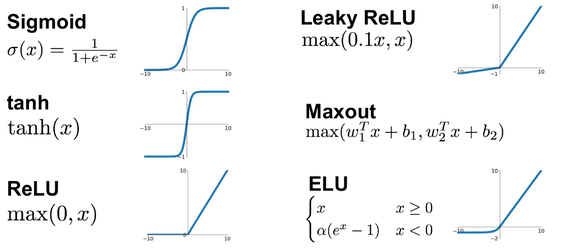